# Capture traces for 9.11

In [1]:
import matplotlib.pyplot as plt

In [ ]:
%run "./File_Uploader.ipynb"

In [80]:
%run "./ANN_Observer.ipynb"

✔️ The Setuper class succesfuly imported.
✔️ The ANN_Observer class succesfuly imported.


In [117]:
%run "./Analyser.ipynb"

✔️ The Analyser succesfuly runned.


## Capture Traces

In [261]:
scope : cw.scope = None
target: cw.target = None

In [262]:
cw_setuper._scope_disc_()

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [263]:
make_dir = "makefile_dir_basic_mult"
re_init_config = {"MAKEDIR" : f'./{make_dir}/'}
cw_setuper = CW_Setuper(firmware_reinit = True, re_init_dict  = re_init_config)
scope = cw_setuper.scope
target = cw_setuper.target

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_basic_mult/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11243 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11243 bytes
✔️ Setuper initiated.


Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1200 [00:00<?, ?it/s]

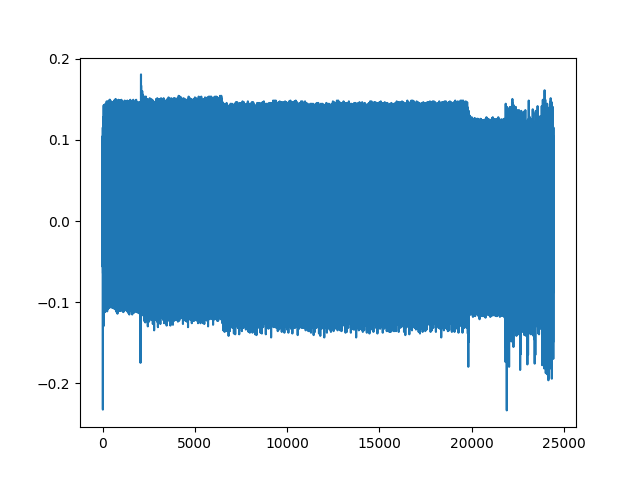

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.


Calculating Correlations for secret key:   0%|          | 0/256 [00:00<?, ?it/s]

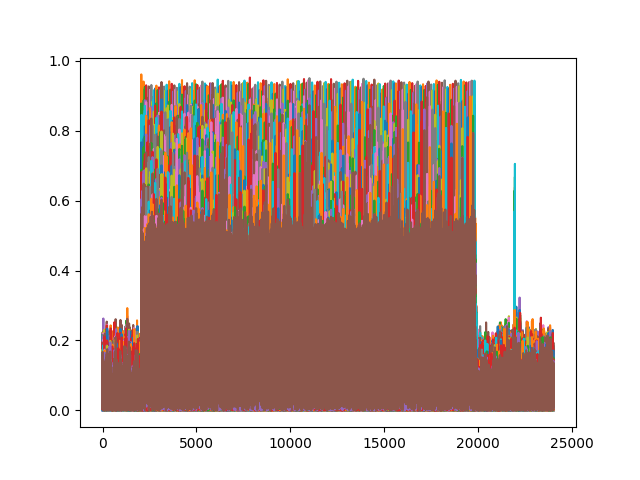

In [264]:
#epochs_list = [800, 1200, 1400]
epochs_list = [1200]
#epochs_list = [1500, 2000, 2500]
ncorr_all = None
decimate = 2
reverse = False
scope = cw_setuper.scope
target = cw_setuper.target
for i in trange(len(epochs_list), desc='Capturing and Analysing the traces:'):
    epochs = epochs_list[i]
    #cmd = 'o'
    #name = f"_OneTimeMult_Dec{decimate}-ntg{decimate}-{epochs}" #ntg no-target-reset
    cmd = 'p'
    name = f"_256TimeMult_Dec{decimate}-ntg{decimate}-{epochs}" #ntg no-target-reset
 
    scope_setup(samples=24429, decimate=decimate)    
    traces, rand_inputs = measure_traces(cmd=cmd)
    waves = []
    out_data = []
    for i in traces:
        waves.append(i[0])
        out_data.append(i[2])
    plot_one(np.array(waves[0]), type = name)
    files = save_data(waves, rand_inputs, out_data[0], name_extended = name)
    #upload_file_to_gdrive(files,  dir_path = "database/")

    #Analysis
    ith_weight = 0
    start = ith_weight*epochs
    ncorr_all = V2_ANN_CPA_OTS(rand_inputs, np.array(waves)[start:start+epochs,:], n_traces = epochs, trace_len = 24000, ith_weight = 0)

    np.save(f"./database/corrs_{name}.npy", np.array(ncorr_all))
    plot_mult(np.array(ncorr_all), type = "tmp")
    """
    secret_weight = []
    index = 0
    for i in out_data[0][3:out_data[0][2]+2]:
        secret_weight.append(i)

    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex = get_weight(np.array(ncorr_all), show_info=False, nextIndex = index)
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[1].set_title("All - Found")

        figure.savefig(f'{name}_correlation.png')

        cw.plot(colmn_maxVector) * cw.plot(ncorr_all[secret_value]) * cw.plot(ncorr_all[secret])
        plt.show()
    """

## Procesing correlations

In [265]:
%run "./Analyser.ipynb"

0
✔️ The Analyser succesfuly runned.


In [266]:
waves = np.load("./database/waves__256TimeMult_Dec2-ntg2-1200.npy")
ncorr_all = np.load("./database/corrs__256TimeMult_Dec2-ntg2-1200.npy")
secret_weight = np.load("./database/weights__256TimeMult_Dec2-ntg2-1200.csv.npy")

In [267]:
secret_weight

array([0])

In range 0 - 24000
 Index of global max: 2062 and global_max_val: 0.9608038029862962


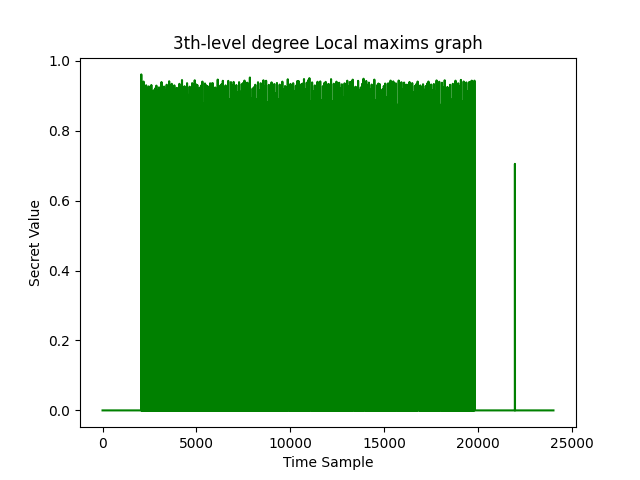

Local maxims: [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 4, 1, 5, 1, 6, 1, 7, 1, 8, 1, 9, 1, 10, 1, 11, 1, 1, 12, 1, 13, 1, 14, 1, 1, 15, 1, 16, 1, 17, 1, 18, 1, 19, 1, 20, 1, 21, 1, 22, 1, 23, 1, 1, 24, 1, 25, 1, 26, 1, 27, 1, 28, 1, 29, 1, 30, 1, 31, 1, 1, 1, 33, 1, 34, 1, 35, 1, 1, 36, 1, 37, 1, 38, 1, 1, 39, 1, 40, 1, 41, 1, 42, 1, 43, 1, 44, 1, 1, 45, 1, 46, 1, 47, 1, 1, 48, 1, 49, 1, 50, 1, 51, 1, 52, 1, 53, 1, 54, 1, 55, 1, 56, 1, 1, 57, 1, 58, 1, 59, 1, 60, 1, 61, 1, 62, 1, 1, 63, 1, 64, 1, 1, 65, 1, 66, 1, 67, 1, 68, 1, 69, 1, 70, 1, 71, 1, 72, 1, 73, 1, 74, 1, 75, 1, 76, 1, 77, 1, 78, 1, 79, 1, 1, 1, 1, 81, 1, 82, 1, 83, 1, 84, 1, 85, 1, 86, 1, 87, 1, 1, 88, 1, 89, 1, 90, 1, 91, 1, 92, 1, 93, 1, 94, 1, 95, 1, 1, 1, 97, 1, 98, 1, 99, 1, 100, 1, 101, 1, 102, 1, 103, 1, 104, 1, 105, 1, 106, 1, 107, 1, 108, 1, 109, 1, 110, 1, 111, 1, 1, 1, 113, 1, 114, 1, 115, 1, 116, 1, 117, 1, 118, 1, 119, 1, 120, 1, 121, 1, 122, 1, 123, 1, 1, 124, 1, 125, 1, 126, 1, 1, 127, 1, 1, 1, 129, 1, 130, 1, 

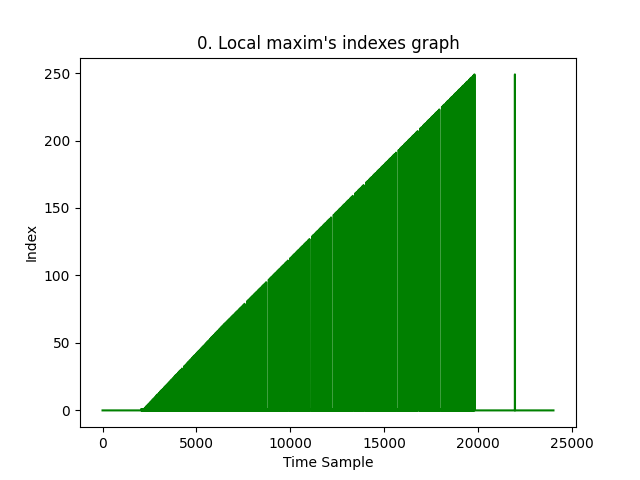

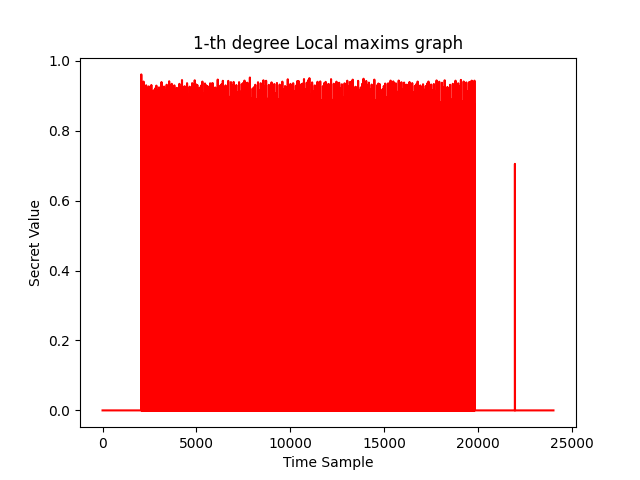

Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 1, 1, 1, 6, 6, 6, 1, 1, 7, 7, 7, 7, 1, 1, 4, 8, 8, 1, 1, 1, 1, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 10, 10, 10, 1, 1, 1, 11, 11, 11, 11, 11, 1, 1, 12, 12, 12, 1, 1, 1, 13, 13, 13, 13, 1, 1, 1, 14, 14, 14, 14, 1, 1, 1, 15, 15, 15, 15, 1, 1, 1, 16, 16, 16, 1, 1, 1, 1, 17, 17, 17, 17, 17, 1, 1, 1, 1, 2, 18, 18, 18, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 1, 1, 1, 1, 20, 20, 20, 20, 1, 1, 1, 21, 21, 21, 21, 1, 1, 1, 22, 22, 22, 22, 1, 1, 1, 23, 23, 23, 23, 23, 1, 1, 24, 24, 24, 24, 1, 1, 1, 25, 25, 25, 25, 1, 1, 1, 1, 26, 26, 26, 26, 1, 1, 1, 1, 27, 27, 27, 27, 27, 1, 1, 1, 28, 28, 28, 28, 1, 1, 1, 1, 29, 29, 29, 29, 29, 1, 1, 1, 30, 30, 30, 30, 1, 1, 1, 31, 31, 31, 31, 1, 1, 1, 32, 32, 32, 1, 1, 1, 1, 33, 33, 33, 1, 1, 1, 1, 1, 1, 1, 34, 34, 34, 1, 1, 1, 1, 1, 1, 1, 35, 35, 35, 35, 35, 1, 1, 1, 36, 36, 36, 1, 1, 1, 1, 

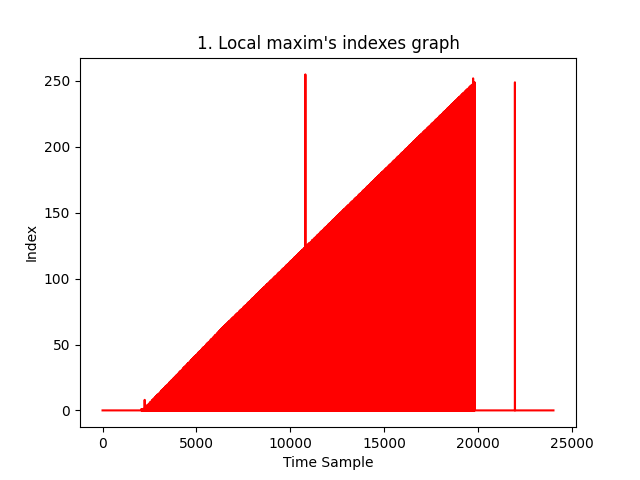

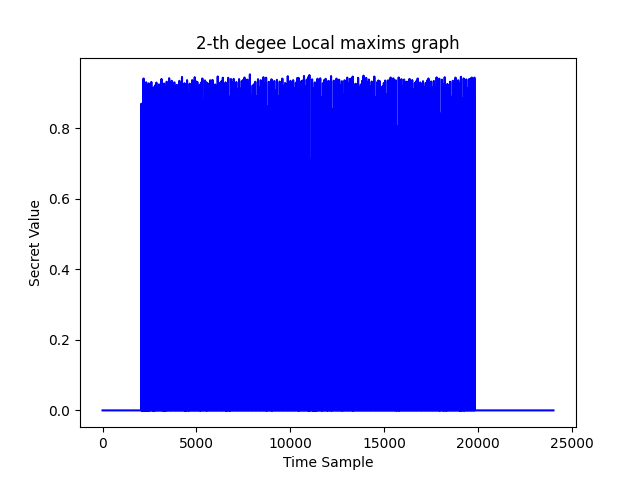

Local maxims: [1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 4, 1, 5, 1, 1, 6, 7, 8, 1, 9, 1, 10, 11, 12, 13, 14, 15, 16, 1, 17, 1, 18, 1, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 1, 34, 1, 35, 36, 1, 37, 38, 39, 40, 41, 42, 43, 44, 45, 1, 46, 47, 48, 49, 50, 1, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 1, 66, 1, 67, 68, 1, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 1, 96, 97, 98, 99, 1, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 1, 120, 121, 122, 123, 124, 125, 126, 1, 127, 1, 128, 129, 1, 130, 1, 131, 1, 132, 1, 133, 134, 135, 136, 1, 137, 138, 139, 140, 1, 141, 142, 143, 1, 144, 145, 146, 147, 148, 149, 150, 151, 1, 152, 153, 154, 155, 156, 157, 158, 159, 1, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 1, 192, 193, 1, 194, 195, 1

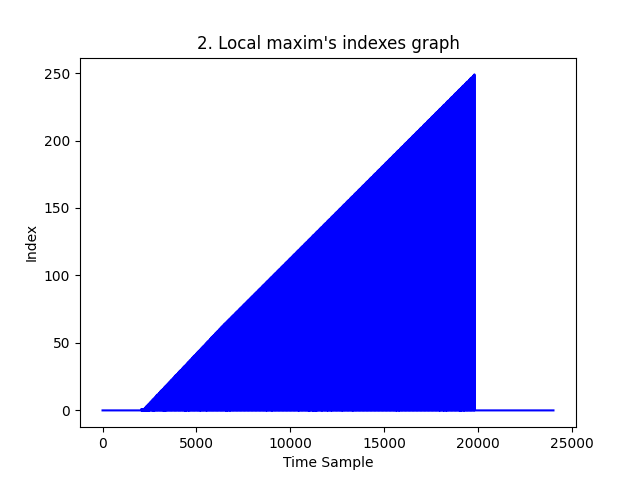

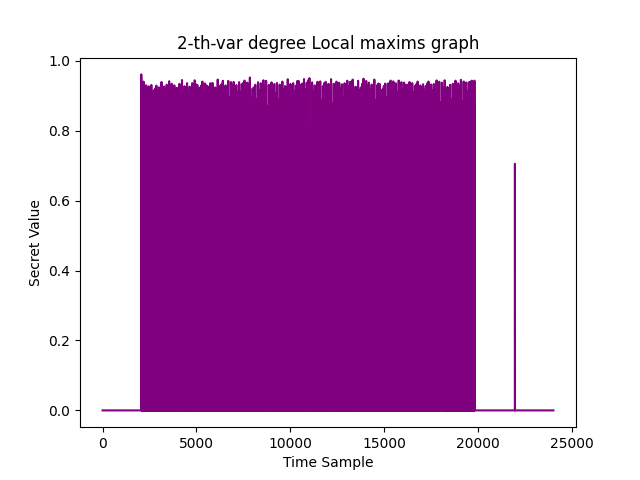

Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 3, 3, 1, 1, 4, 1, 1, 1, 5, 5, 1, 1, 6, 6, 1, 7, 7, 1, 8, 1, 9, 9, 9, 1, 1, 10, 10, 1, 11, 11, 11, 1, 12, 1, 13, 13, 13, 1, 14, 14, 1, 15, 15, 15, 1, 16, 16, 1, 1, 17, 17, 17, 1, 1, 18, 18, 1, 1, 19, 19, 19, 1, 20, 20, 1, 21, 21, 21, 1, 22, 22, 22, 1, 23, 23, 23, 1, 24, 24, 1, 25, 25, 25, 1, 26, 26, 26, 1, 27, 27, 27, 27, 1, 28, 28, 28, 1, 29, 29, 29, 1, 30, 30, 30, 1, 31, 31, 31, 1, 32, 1, 33, 33, 1, 1, 1, 34, 34, 1, 1, 35, 35, 35, 1, 36, 36, 1, 1, 37, 37, 37, 1, 38, 38, 38, 1, 39, 39, 39, 1, 40, 1, 41, 41, 41, 1, 42, 42, 1, 43, 43, 43, 1, 44, 44, 44, 1, 45, 45, 45, 1, 1, 46, 46, 46, 1, 47, 47, 47, 1, 48, 1, 49, 49, 49, 1, 50, 50, 50, 1, 1, 51, 51, 51, 1, 52, 52, 1, 53, 53, 53, 1, 54, 54, 54, 1, 55, 55, 55, 1, 56, 1, 57, 57, 57, 1, 58, 58, 58, 1, 59, 59, 59, 1, 60, 60, 60, 1, 61, 1, 62, 62, 62, 1, 63, 63, 63, 1, 64, 64, 1, 65, 65, 1, 1, 1, 1, 66, 66, 1, 1, 67, 67, 67, 67, 1, 68, 68, 1, 1, 1, 69, 69, 69, 1, 70, 70, 70, 1,

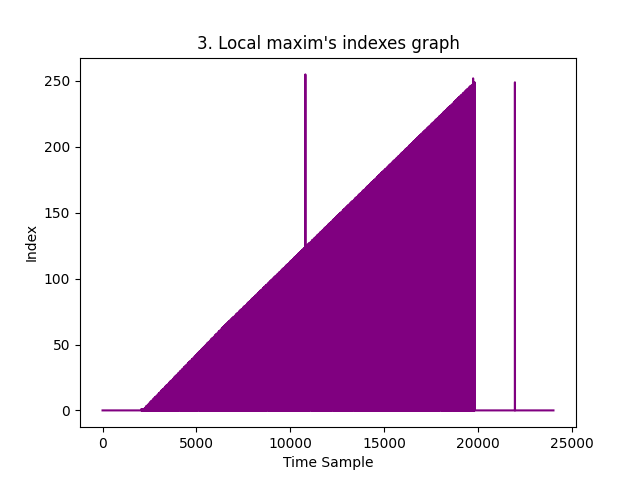

 Found the soonest secret value is 1, at the time sample 2066, with correlation secret_corr = 0.869


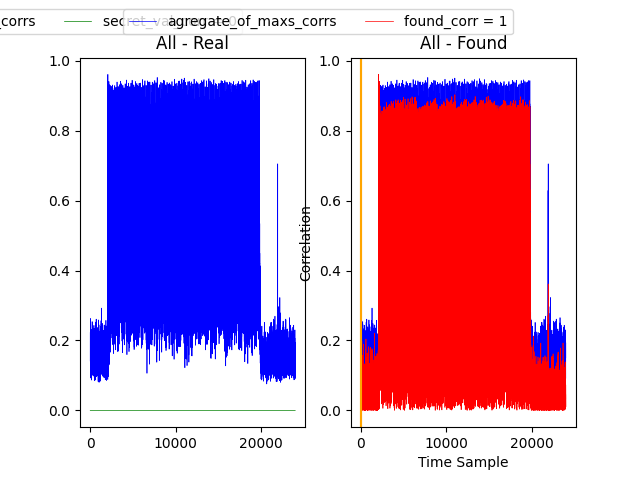

In range 2078 - 24000
 Found the soonest secret value is 1, at the time sample 2090, with correlation secret_corr = 0.680


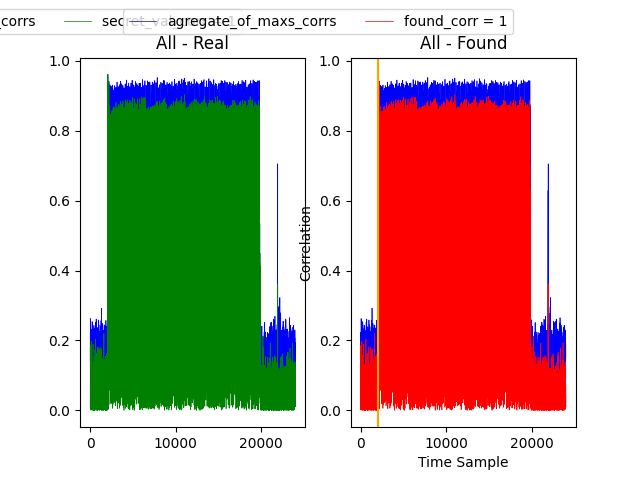

In range 2101 - 24000
 Found the soonest secret value is 1, at the time sample 2111, with correlation secret_corr = 0.664


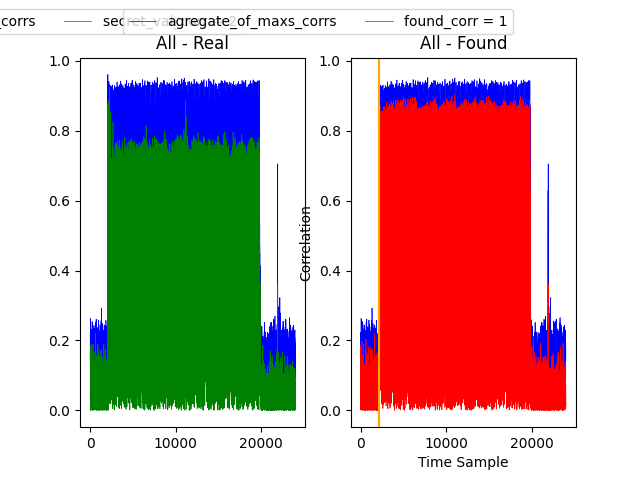

In range 2122 - 24000
 Found the soonest secret value is 1, at the time sample 2132, with correlation secret_corr = 0.693


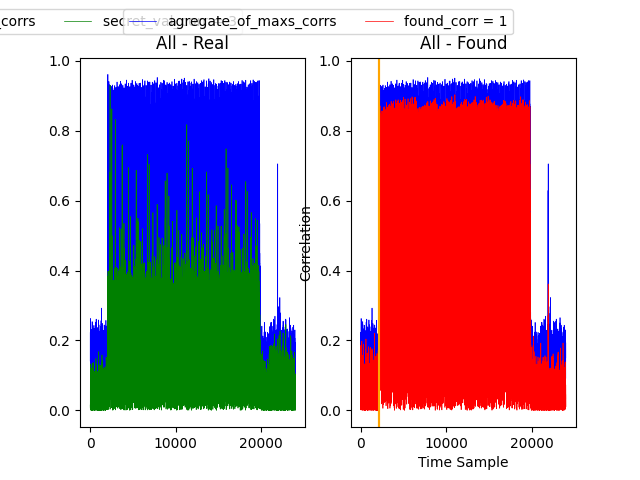

In range 2157 - 24000
 Found the soonest secret value is 1, at the time sample 2182, with correlation secret_corr = 0.940


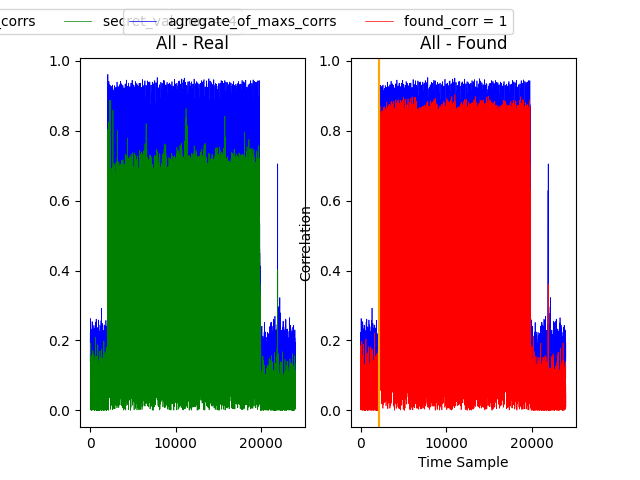

In [268]:
    #secret_weight = []
    index = 0
    #for i in out_data[0][3:out_data[0][2]+2]:
    #    secret_weight.append(i)
    stop_num = 5
    maxims_map = None
    last_found_indx = 0


    secret_weight = []
    for i in range(50):
        secret_weight.append(i)
    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(np.array(ncorr_all),
                                                                                                                     peak_range = 0.3,
                                                                                                                     show_info=True,
                                                                                                                     lastIndex=index,
                                                                                                                     map_2dgrMaxs=maxims_map,
                                                                                                                     mountain_half_dist = 5,
                                                                                                                    level = 3)
        
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = last_found_indx, color = 'orange')
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = last_found_indx, color = 'orange')

        #figure.savefig(f'{name}_correlation.png')

        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample

### Archive, with 4*nop during each mult

In range 0 - 24000
 Index of global max: 2454 and global_max_val: 0.9396902127985421


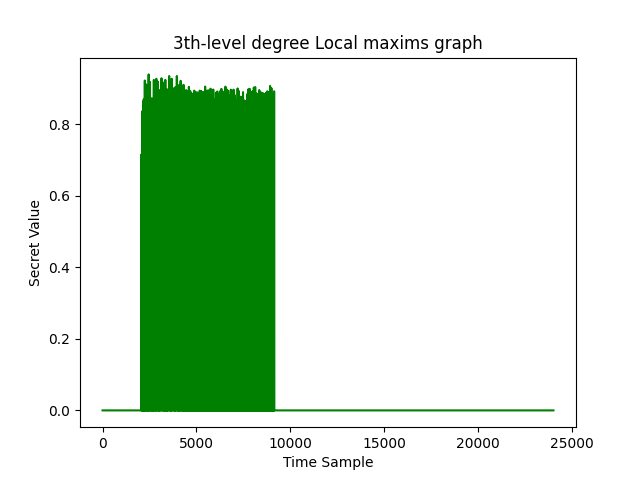

Local maxims: [1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 5, 1, 6, 7, 1, 1, 8, 1, 9, 10, 1, 1, 11, 12, 1, 13, 1, 1, 14, 15, 1, 1, 17, 1, 1, 18, 19, 1, 1, 20, 21, 22, 1, 1, 23, 24, 25, 1, 1, 26, 27, 28, 1, 1, 29, 1, 30, 31, 1, 1, 1, 1, 33, 1, 1, 1, 1, 35, 1, 1, 36, 1, 1, 37, 1, 1, 38, 1, 1, 39, 1, 1, 40, 1, 1, 41, 1, 1, 42, 1, 1, 43, 1, 1, 44, 1, 1, 45, 1, 1, 1, 46, 1, 1, 47, 1, 1, 48, 1, 1, 49, 1, 1, 50, 1, 1, 51, 1, 1, 52, 1, 1, 53, 1, 1, 54, 1, 1, 55, 1, 1, 56, 1, 1, 57, 1, 1, 58, 1, 1, 59, 1, 1, 60, 1, 1, 61, 1, 1, 62, 1, 1, 63, 1, 1, 1, 1, 65, 1, 1, 66, 1, 1, 67, 1, 1, 68, 1, 1, 69, 1, 1, 70, 1, 1, 71, 1, 1, 72, 1, 1, 73, 1, 1, 74, 1, 1, 75, 1, 1, 76, 1, 1, 1, 1, 78, 1, 1, 79, 1, 1, 80, 1, 1, 81, 1, 1, 1, 1, 83, 1, 1, 84, 1, 1, 85, 1, 1, 86, 1, 1, 87, 1, 1, 44, 1, 1, 89, 1, 1, 90, 1, 1, 91, 1, 1, 92, 1, 1, 93, 1, 1, 94, 1, 1, 95, 1, 1, 96, 1, 1, 97, 1, 1, 98, 1, 1, 99, 1]


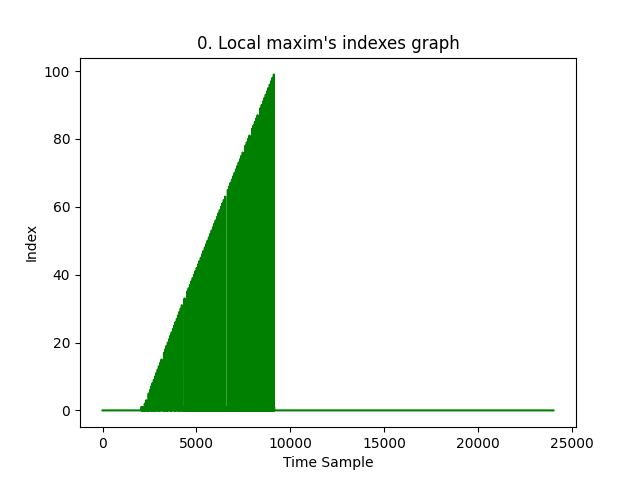

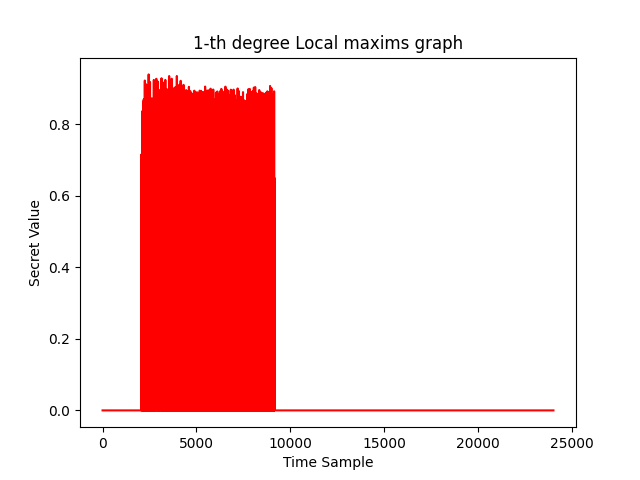

Local maxims: [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 5, 1, 1, 1, 6, 6, 1, 7, 7, 1, 1, 8, 1, 1, 1, 1, 1, 9, 9, 1, 1, 1, 1, 1, 1, 10, 1, 1, 11, 1, 12, 12, 1, 1, 13, 13, 13, 1, 1, 1, 1, 1, 14, 1, 15, 15, 1, 16, 1, 1, 17, 1, 1, 1, 1, 1, 18, 18, 1, 1, 19, 19, 19, 1, 1, 20, 1, 21, 21, 1, 22, 22, 22, 1, 1, 1, 23, 1, 24, 24, 1, 25, 25, 25, 1, 1, 1, 26, 1, 1, 27, 27, 27, 1, 1, 28, 1, 1, 29, 1, 1, 30, 30, 1, 31, 31, 1, 1, 1, 1, 33, 33, 33, 1, 1, 1, 1, 1, 1, 1, 34, 34, 1, 1, 1, 1, 1, 1, 35, 35, 1, 1, 36, 36, 36, 1, 1, 1, 37, 37, 37, 1, 1, 1, 38, 38, 1, 1, 39, 39, 39, 1, 1, 40, 1, 1, 41, 41, 41, 1, 1, 42, 42, 42, 1, 1, 1, 1, 43, 43, 43, 1, 1, 44, 44, 44, 1, 1, 45, 45, 45, 1, 1, 1, 46, 46, 1, 1, 1, 47, 47, 47, 1, 1, 48, 1, 1, 49, 49, 49, 1, 1, 1, 50, 50, 50, 1, 1, 1, 51, 51, 1, 1, 52, 52, 52, 1, 1, 53, 53, 53, 1, 1, 54, 54, 54, 1, 1, 1, 1, 55, 55, 1, 1, 56, 1, 1, 57, 57, 57, 1, 1, 58, 58, 1, 1, 59, 59, 59, 1, 1, 60, 60, 1, 1, 61, 61, 1, 1, 62, 62, 1, 1, 63, 63, 

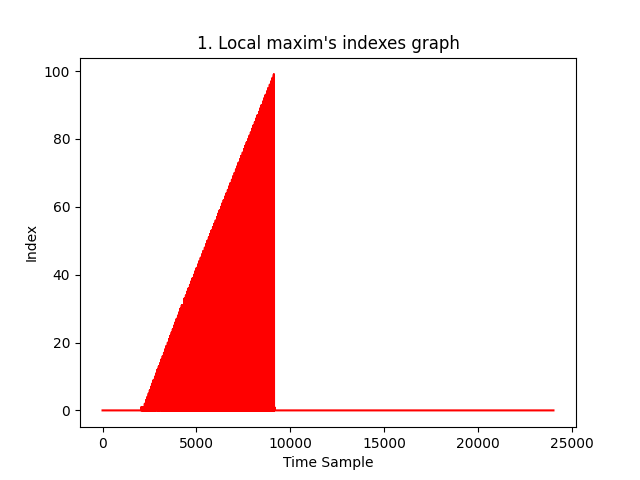

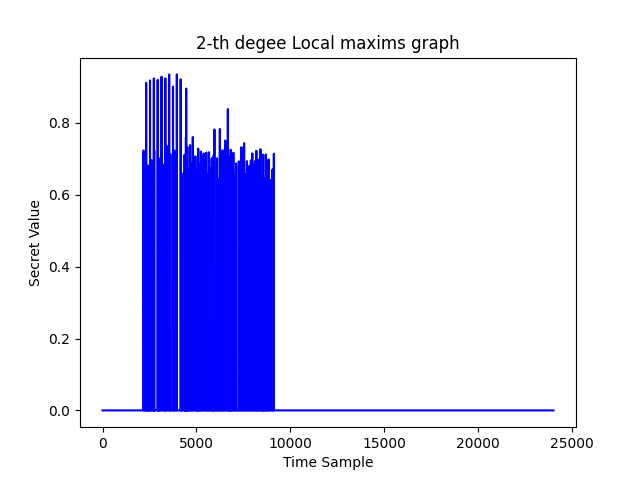

Local maxims: [1, 1, 3, 4, 1, 1, 6, 7, 1, 9, 1, 12, 13, 1, 15, 1, 18, 19, 21, 22, 24, 25, 27, 30, 31, 33, 1, 34, 1, 1, 35, 36, 37, 38, 39, 41, 42, 1, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 1, 55, 57, 58, 59, 60, 61, 62, 63, 65, 66, 1, 67, 68, 69, 35, 71, 73, 74, 75, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 1, 92, 93, 94, 95, 97, 98, 99]


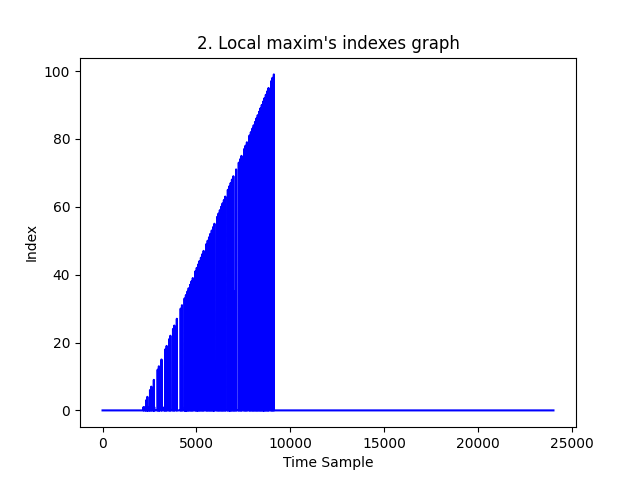

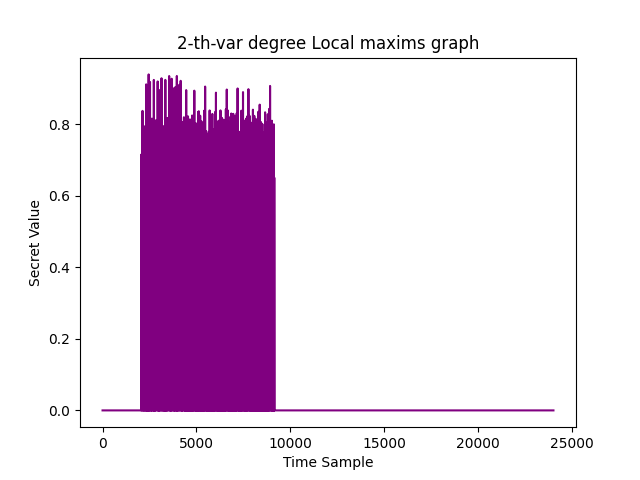

Local maxims: [1, 1, 1, 1, 1, 1, 3, 1, 4, 4, 1, 1, 1, 5, 1, 6, 7, 7, 1, 1, 9, 1, 1, 10, 1, 12, 1, 13, 13, 1, 1, 14, 15, 16, 1, 1, 1, 1, 18, 1, 19, 1, 21, 22, 22, 22, 1, 23, 24, 25, 25, 1, 26, 27, 27, 1, 1, 29, 30, 31, 31, 1, 1, 33, 33, 1, 1, 1, 1, 34, 34, 1, 1, 1, 35, 35, 1, 36, 36, 1, 37, 37, 1, 38, 38, 1, 39, 1, 1, 41, 41, 41, 1, 42, 42, 1, 43, 43, 1, 44, 44, 1, 45, 1, 46, 46, 1, 47, 47, 1, 1, 49, 49, 1, 50, 50, 1, 51, 51, 1, 52, 52, 1, 53, 1, 54, 1, 1, 55, 55, 1, 1, 57, 57, 57, 1, 58, 1, 59, 1, 60, 1, 61, 1, 62, 1, 63, 1, 1, 65, 65, 1, 66, 66, 66, 1, 1, 67, 67, 1, 68, 1, 69, 69, 1, 70, 35, 1, 71, 1, 1, 73, 73, 1, 74, 74, 1, 75, 75, 1, 1, 77, 77, 77, 1, 78, 1, 79, 1, 1, 81, 81, 1, 82, 82, 1, 83, 83, 1, 84, 1, 85, 1, 86, 1, 87, 87, 1, 88, 1, 89, 1, 90, 1, 91, 1, 1, 92, 92, 1, 93, 1, 94, 1, 95, 1, 1, 97, 97, 1, 98, 1, 99, 99, 99, 1]


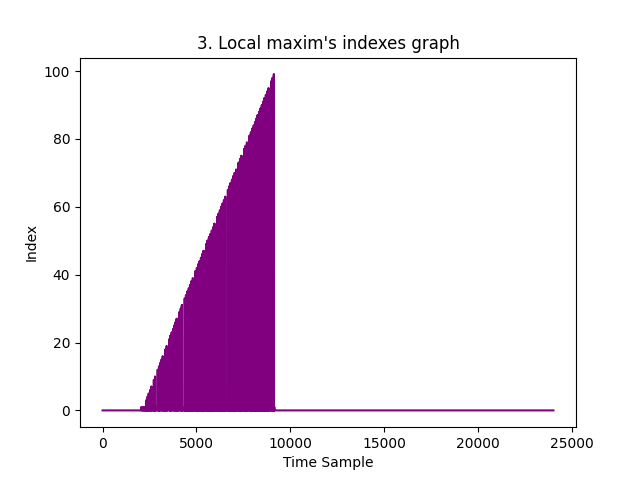

 Found the soonest secret value is 1, at the time sample 2182, with correlation secret_corr = 0.723


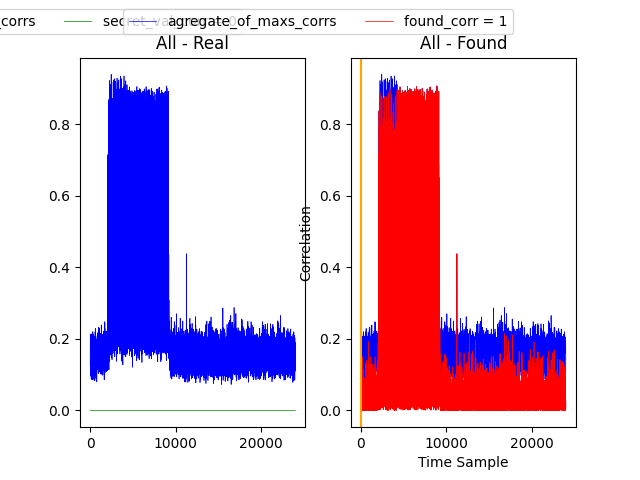

In range 2228 - 24000
 Found the soonest secret value is 1, at the time sample 2274, with correlation secret_corr = 0.676


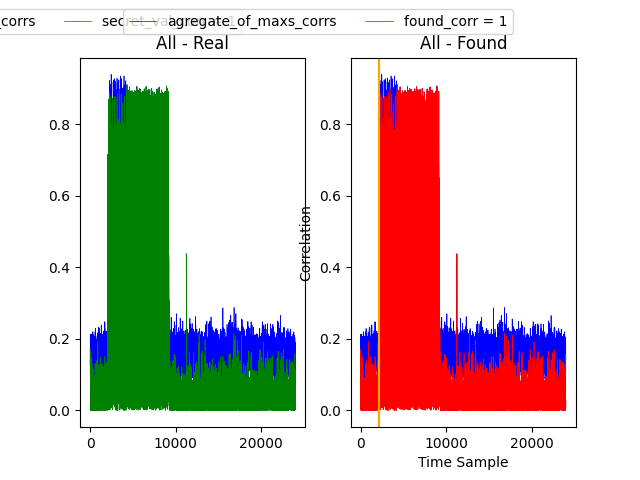

In range 2298 - 24000
 Found the soonest secret value is 3, at the time sample 2322, with correlation secret_corr = 0.912


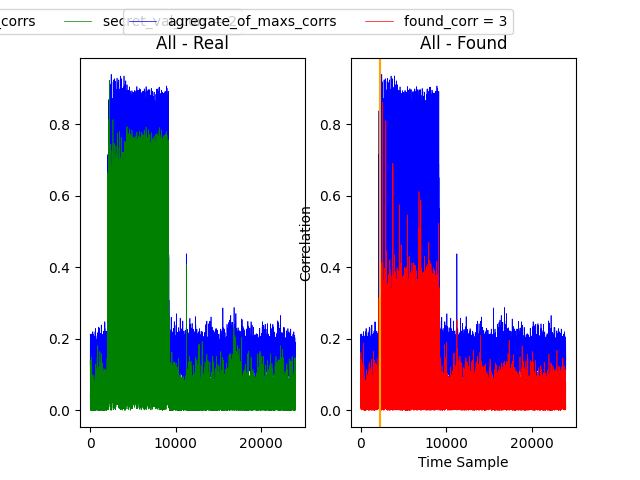

In range 2354 - 24000
 Found the soonest secret value is 4, at the time sample 2386, with correlation secret_corr = 0.643


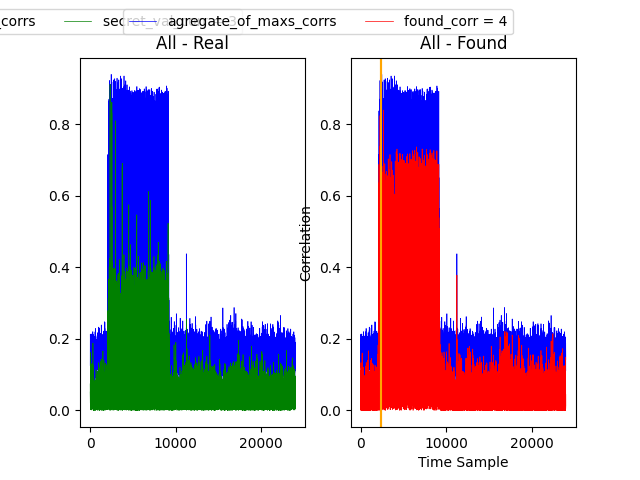

In range 2398 - 24000
 Found the soonest secret value is 1, at the time sample 2410, with correlation secret_corr = 0.682


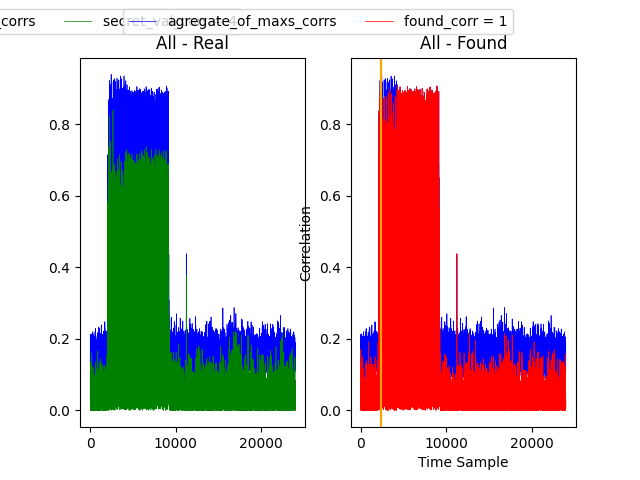

In [228]:
    #secret_weight = []
    index = 0
    #for i in out_data[0][3:out_data[0][2]+2]:
    #    secret_weight.append(i)
    stop_num = 5
    maxims_map = None
    last_found_indx = 0


    secret_weight = []
    for i in range(50):
        secret_weight.append(i)
    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(np.array(ncorr_all),
                                                                                                                     peak_range = 0.3,
                                                                                                                     show_info=True,
                                                                                                                     lastIndex=index,
                                                                                                                     map_2dgrMaxs=maxims_map,
                                                                                                                     mountain_half_dist = 5,
                                                                                                                    level = 3)
        
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = last_found_indx, color = 'orange')
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = last_found_indx, color = 'orange')

        #figure.savefig(f'{name}_correlation.png')

        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample

In range 0 - 24000
 Index of global max: 2062 and global_max_val: 0.9615578481942197


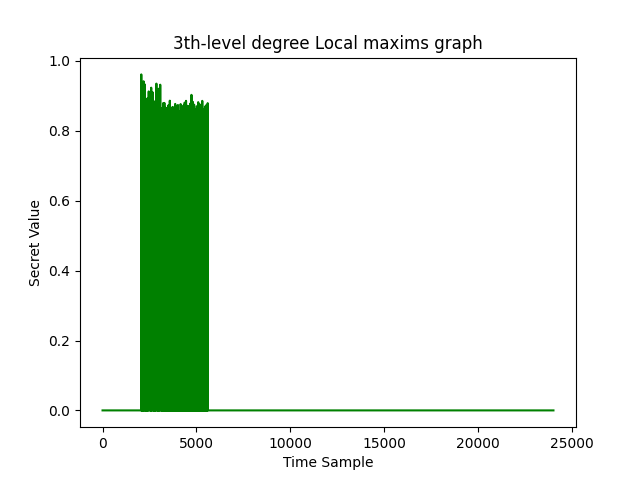

Local maxims: [1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 4, 1, 5, 1, 1, 7, 1, 8, 9, 1, 1, 10, 1, 11, 12, 1, 1, 13, 1, 14, 15, 1, 1, 1, 1, 17, 1, 1, 18, 1, 1, 19, 1, 1, 20, 1, 1, 21, 1, 1, 22, 1, 1, 23, 1, 1, 24, 1, 1, 25, 1, 1, 26, 1, 1, 27, 1, 1, 28, 1, 1, 29, 1, 1, 30, 1, 1, 31, 1, 1, 1, 1, 33, 1, 1, 34, 1, 1, 35, 1, 1, 1, 1, 37, 1, 1, 38, 1, 1, 39, 1, 1, 40, 1, 1, 41, 1, 1, 42, 1, 1, 43, 1, 1, 44, 1, 1, 45, 1, 1, 46, 1, 1, 47, 1, 1, 1, 1, 49, 1]


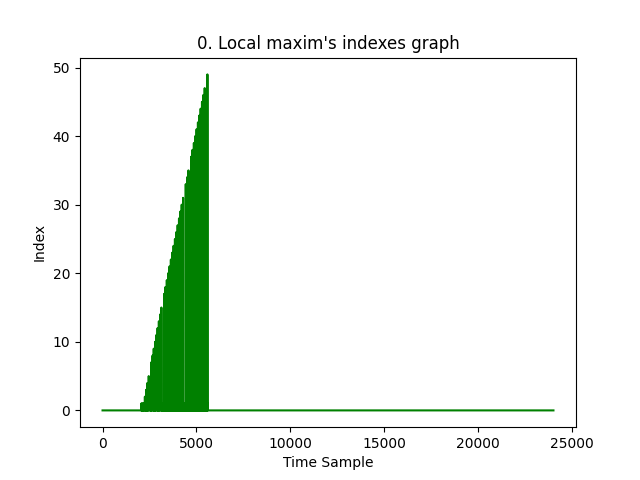

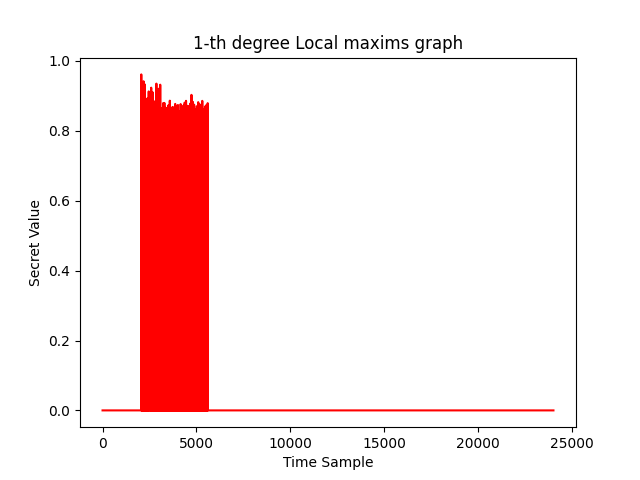

Local maxims: [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 4, 1, 1, 1, 5, 5, 5, 6, 6, 1, 1, 7, 1, 4, 8, 9, 9, 1, 1, 10, 1, 1, 11, 11, 11, 11, 12, 1, 1, 13, 1, 14, 14, 14, 14, 15, 15, 1, 1, 1, 1, 17, 17, 1, 1, 18, 18, 1, 1, 1, 19, 19, 19, 1, 1, 20, 1, 1, 21, 21, 1, 1, 22, 22, 1, 1, 23, 23, 1, 1, 24, 1, 1, 25, 25, 25, 1, 1, 26, 26, 1, 1, 27, 27, 1, 1, 28, 28, 1, 1, 29, 29, 1, 1, 30, 30, 1, 1, 31, 31, 1, 1, 1, 1, 33, 33, 1, 1, 34, 1, 1, 1, 35, 35, 1, 1, 36, 1, 1, 37, 37, 1, 1, 38, 38, 1, 1, 39, 39, 1, 1, 40, 1, 1, 41, 41, 1, 1, 42, 42, 1, 1, 43, 43, 43, 1, 1, 44, 44, 1, 1, 45, 45, 1, 1, 46, 46, 1, 1, 47, 47, 1, 1, 1, 1, 49, 49, 1]


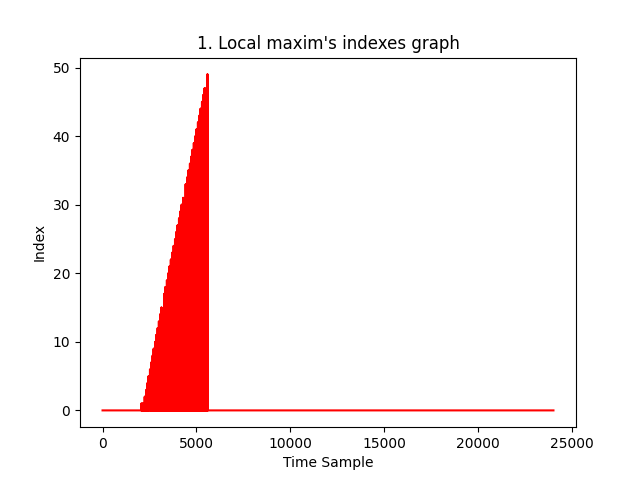

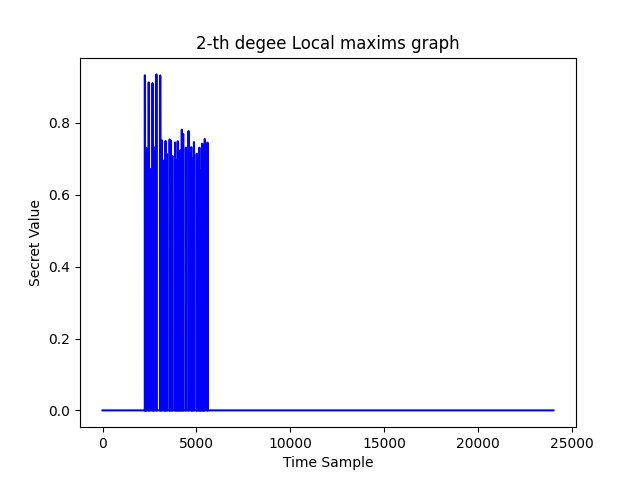

Local maxims: [2, 1, 1, 3, 5, 6, 8, 9, 11, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 33, 35, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 49]


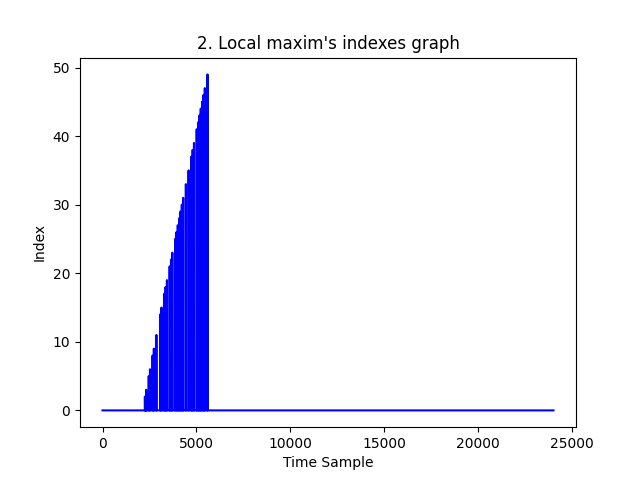

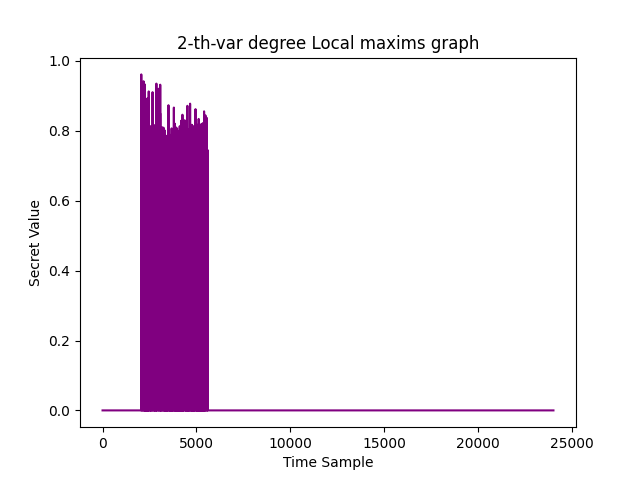

Local maxims: [1, 1, 1, 2, 2, 1, 1, 3, 1, 4, 1, 5, 5, 6, 1, 1, 8, 9, 1, 1, 11, 11, 11, 1, 13, 14, 14, 14, 15, 1, 1, 17, 1, 18, 1, 19, 19, 1, 1, 21, 21, 1, 22, 1, 23, 1, 1, 25, 25, 1, 26, 1, 27, 1, 28, 1, 29, 1, 30, 1, 31, 1, 1, 33, 1, 1, 1, 35, 1, 1, 37, 37, 1, 38, 1, 39, 1, 1, 41, 41, 1, 42, 1, 43, 1, 44, 1, 45, 1, 46, 1, 47, 1, 1, 49]


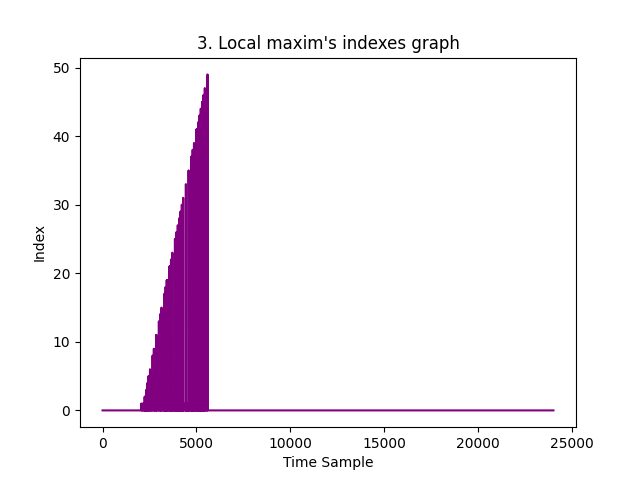

 Found the soonest secret value is 2, at the time sample 2254, with correlation secret_corr = 0.933


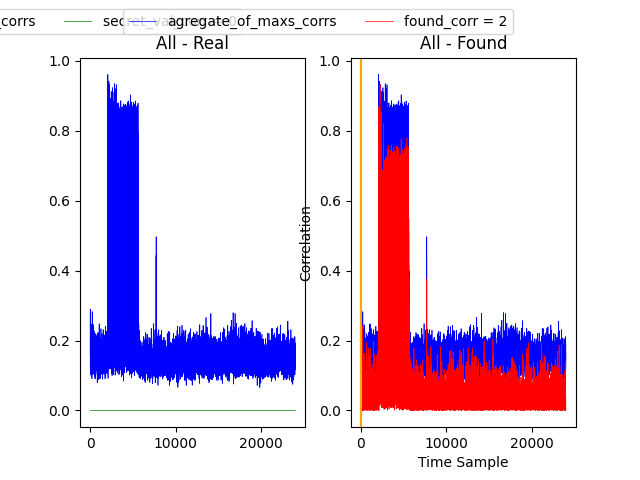

In range 2265 - 24000
 Found the soonest secret value is 1, at the time sample 2277, with correlation secret_corr = 0.722


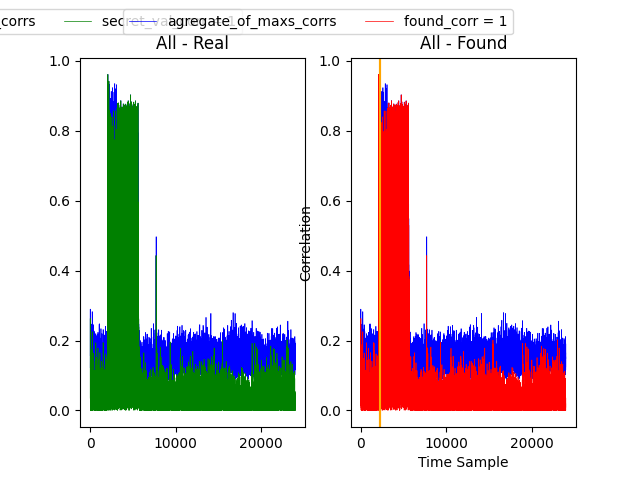

In range 2288 - 24000
 Found the soonest secret value is 1, at the time sample 2299, with correlation secret_corr = 0.675


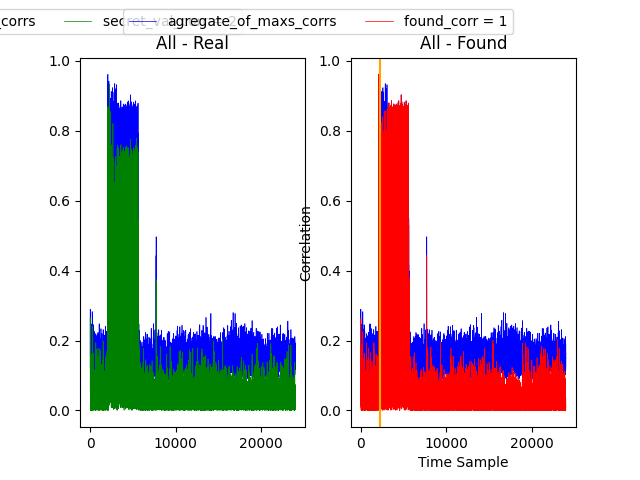

In range 2311 - 24000
 Found the soonest secret value is 3, at the time sample 2323, with correlation secret_corr = 0.731


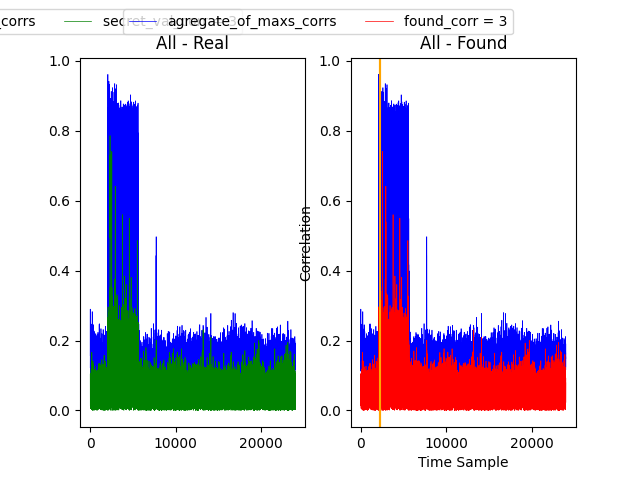

In range 2390 - 24000
 Found the soonest secret value is 5, at the time sample 2458, with correlation secret_corr = 0.913


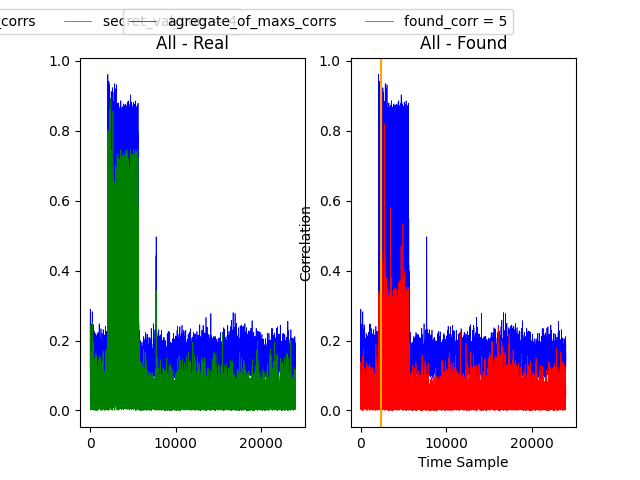

In [222]:
    #secret_weight = []
    index = 0
    #for i in out_data[0][3:out_data[0][2]+2]:
    #    secret_weight.append(i)
    stop_num = 5
    maxims_map = None
    last_found_indx = 0


    secret_weight = []
    for i in range(50):
        secret_weight.append(i)
    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(np.array(ncorr_all),
                                                                                                                     peak_range = 0.3,
                                                                                                                     show_info=True,
                                                                                                                     lastIndex=index,
                                                                                                                     map_2dgrMaxs=maxims_map,
                                                                                                                     mountain_half_dist = 5,
                                                                                                                    level = 3)
        
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = last_found_indx, color = 'orange')
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = last_found_indx, color = 'orange')

        #figure.savefig(f'{name}_correlation.png')

        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample

In range 0 - 24000
 Index of global max: 6278 and global_max_val: 0.9450127072002897


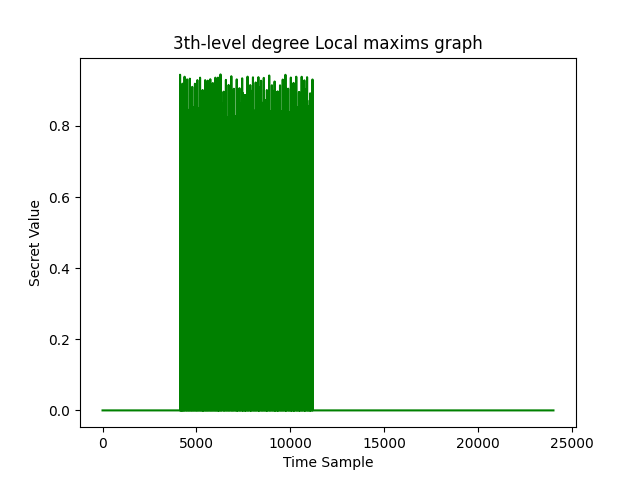

Local maxims: [1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 4, 1, 5, 1, 6, 1, 7, 1, 8, 1, 1, 9, 1, 10, 1, 11, 1, 12, 1, 13, 1, 14, 1, 1, 15, 1, 1, 1, 17, 1, 18, 1, 19, 1, 20, 1, 21, 1, 1, 22, 1, 23, 1, 1, 24, 1, 1, 25, 1, 26, 1, 1, 27, 1, 28, 1, 29, 1, 1, 30, 1, 31, 1, 32, 1, 1, 33, 1, 34, 1, 35, 1, 1, 36, 1, 1, 37, 1, 38, 1, 39, 1, 1, 40, 1, 41, 1, 1, 42, 1, 1, 43, 1, 44, 1, 1, 45, 1, 46, 1, 1, 47, 1, 48, 1, 1, 49]


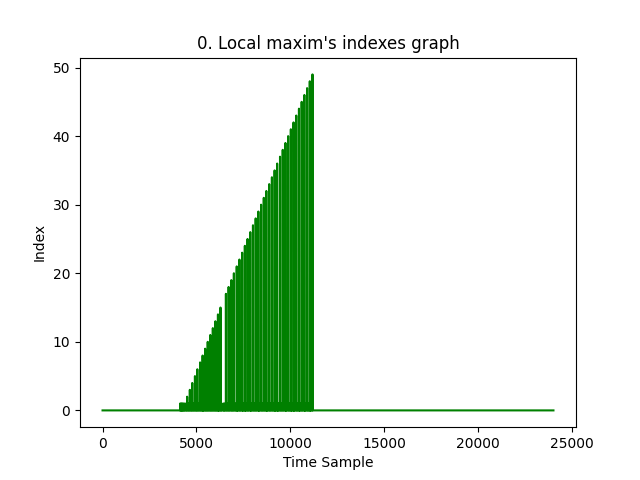

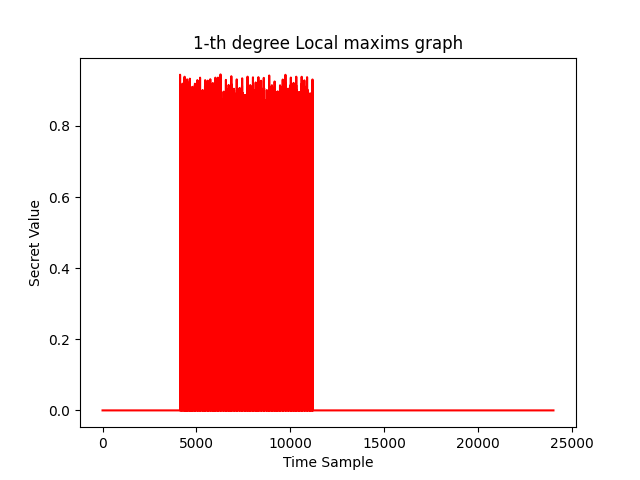

Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 2, 5, 5, 5, 5, 5, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 4, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 1, 1, 1, 10, 10, 10, 10, 10, 10, 1, 1, 1, 1, 1, 11, 11, 11, 11, 11, 11, 1, 1, 1, 1, 1, 1, 12, 12, 12, 12, 12, 12, 1, 1, 1, 1, 1, 1, 13, 13, 13, 13, 13, 13, 1, 1, 1, 1, 1, 14, 14, 14, 14, 14, 14, 1, 1, 1, 1, 1, 15, 15, 15, 15, 15, 15, 1, 1, 1, 1, 1, 16, 16, 16, 1, 1, 1, 1, 1, 1, 17, 17, 17, 17, 17, 1, 1, 1, 1, 1, 18, 18, 18, 18, 18, 18, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 19, 19, 1, 1, 1, 1, 1, 20, 20, 20, 20, 20, 20, 1, 1, 1, 1, 1, 21, 21, 21, 21, 21, 21, 1, 1, 1, 1, 1, 22, 22, 22, 22, 22, 22, 1, 1, 1, 1, 1, 1, 23, 23, 23, 23, 23, 23, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 1, 1, 1, 1, 1, 1, 25, 25, 25, 25, 25, 25, 1, 1, 1, 1, 1, 1, 26, 26, 26, 26, 26, 26, 1, 1, 1, 1, 1, 

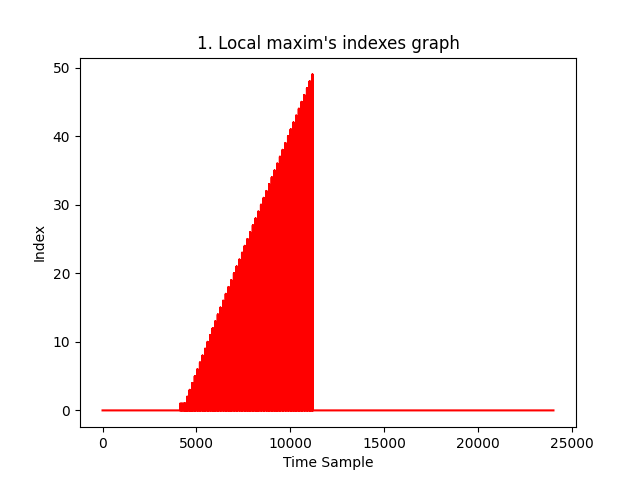

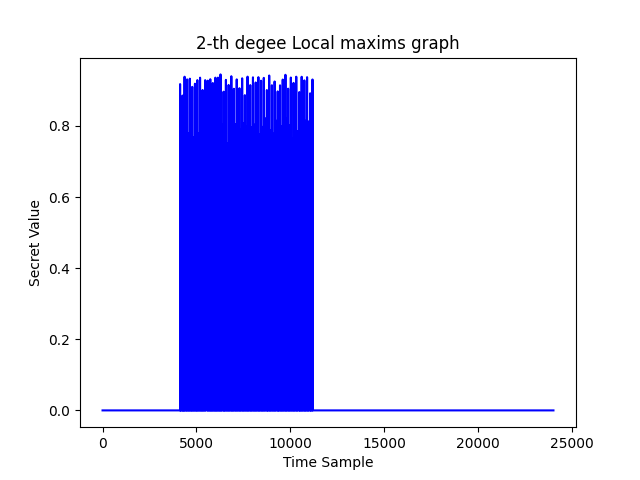

Local maxims: [1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 4, 1, 5, 1, 6, 1, 7, 1, 8, 1, 9, 10, 1, 11, 1, 12, 1, 13, 1, 14, 1, 15, 1, 1, 1, 17, 1, 18, 1, 19, 1, 20, 1, 21, 1, 22, 1, 23, 1, 24, 1, 25, 1, 26, 1, 27, 1, 28, 1, 29, 1, 30, 1, 31, 1, 1, 1, 33, 1, 34, 1, 35, 1, 1, 1, 37, 1, 38, 1, 39, 1, 40, 1, 41, 1, 42, 1, 43, 1, 1, 1, 45, 1, 46, 1, 47, 1, 1, 1, 49]


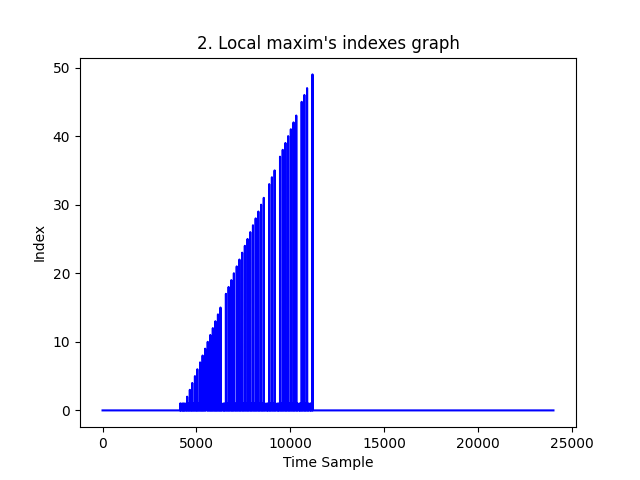

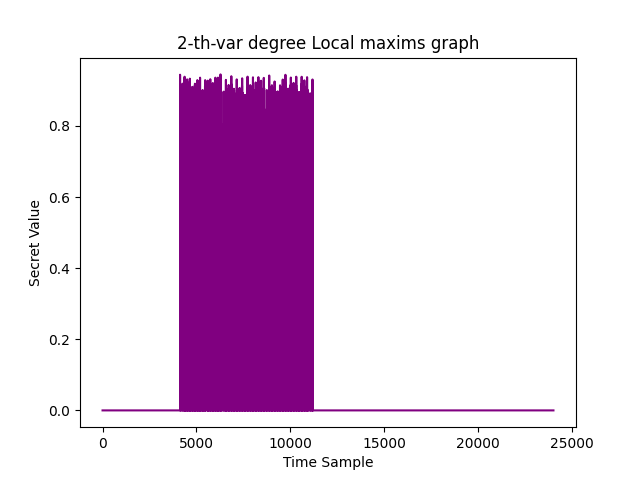

Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 3, 3, 1, 1, 1, 4, 4, 4, 1, 1, 1, 5, 5, 1, 1, 1, 6, 6, 1, 1, 1, 1, 7, 7, 1, 1, 1, 8, 8, 1, 1, 1, 9, 9, 1, 1, 10, 10, 10, 1, 1, 1, 1, 11, 11, 1, 1, 1, 1, 12, 12, 12, 1, 1, 1, 1, 13, 13, 13, 1, 1, 1, 1, 14, 14, 1, 1, 1, 1, 15, 15, 1, 1, 1, 1, 1, 1, 1, 1, 17, 17, 1, 1, 1, 18, 18, 18, 1, 1, 1, 1, 19, 19, 19, 1, 1, 1, 1, 20, 20, 1, 1, 1, 21, 21, 21, 1, 1, 1, 1, 22, 22, 1, 1, 1, 1, 23, 23, 23, 1, 1, 1, 1, 24, 24, 1, 1, 1, 1, 25, 25, 25, 1, 1, 1, 1, 26, 26, 26, 1, 1, 1, 1, 27, 27, 27, 1, 1, 1, 1, 28, 28, 28, 1, 1, 1, 1, 29, 29, 29, 1, 1, 1, 1, 30, 30, 1, 1, 1, 1, 31, 31, 1, 1, 1, 1, 32, 1, 1, 1, 1, 33, 33, 33, 1, 1, 1, 1, 34, 34, 1, 1, 1, 1, 35, 35, 35, 1, 1, 1, 1, 36, 36, 1, 1, 1, 1, 37, 37, 37, 1, 1, 1, 1, 38, 38, 1, 1, 1, 1, 39, 39, 39, 1, 1, 1, 1, 40, 40, 1, 1, 1, 1, 41, 41, 1, 1, 1, 1, 42, 42, 42, 1, 1, 1, 1, 43, 43, 43, 1, 1, 1, 1, 44, 44, 1, 1, 1, 1, 45, 45, 45, 45, 1, 1, 1, 1, 46, 46, 1, 1, 1, 1, 47, 47, 1

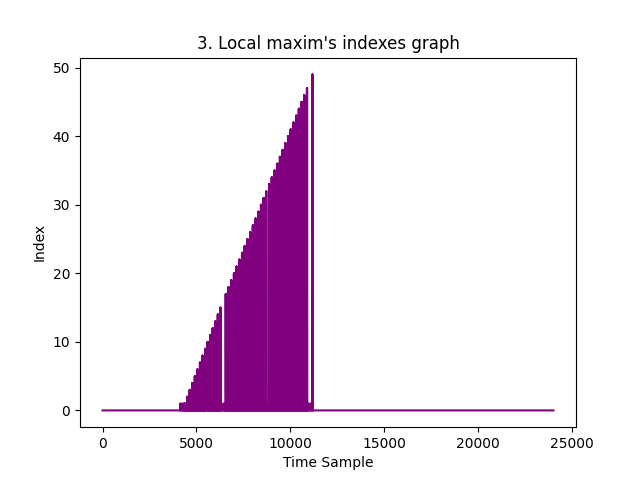

 Found the soonest secret value is 1, at the time sample 4127, with correlation secret_corr = 0.918


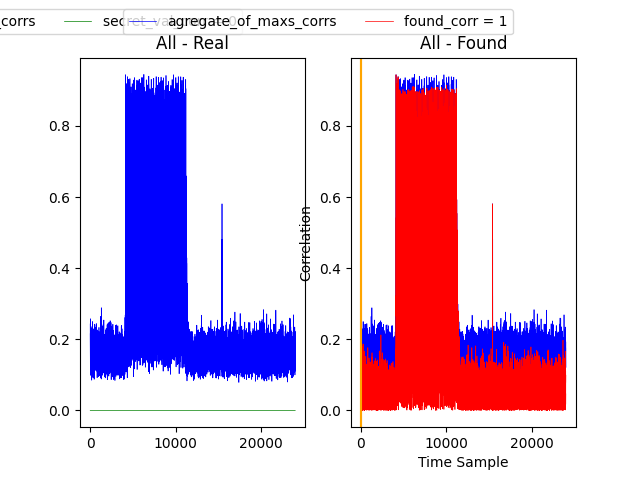

In range 4150 - 24000
 Found the soonest secret value is 1, at the time sample 4174, with correlation secret_corr = 0.826


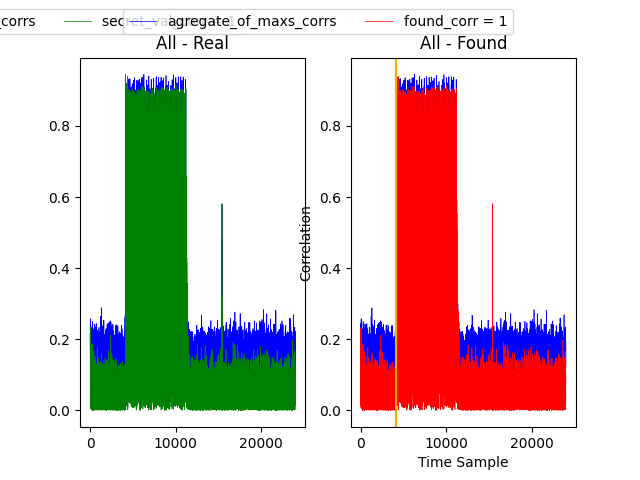

In range 4216 - 24000
 Found the soonest secret value is 1, at the time sample 4258, with correlation secret_corr = 0.885


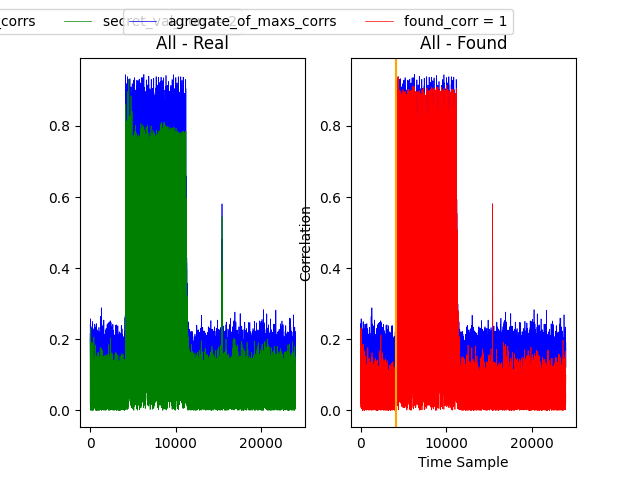

In range 4282 - 24000
 Found the soonest secret value is 1, at the time sample 4306, with correlation secret_corr = 0.800


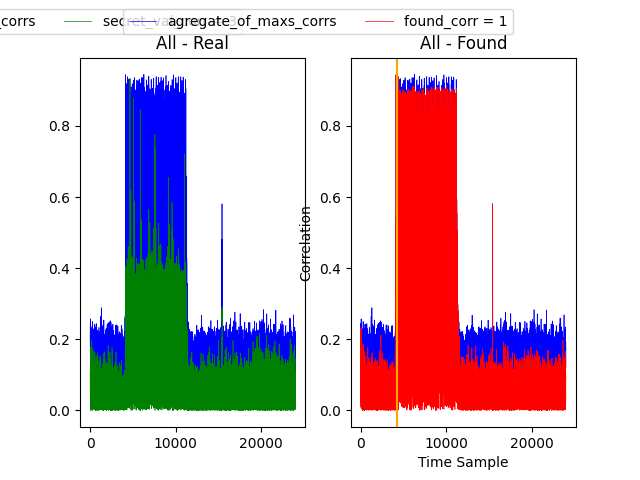

In range 4336 - 24000
 Found the soonest secret value is 1, at the time sample 4366, with correlation secret_corr = 0.938


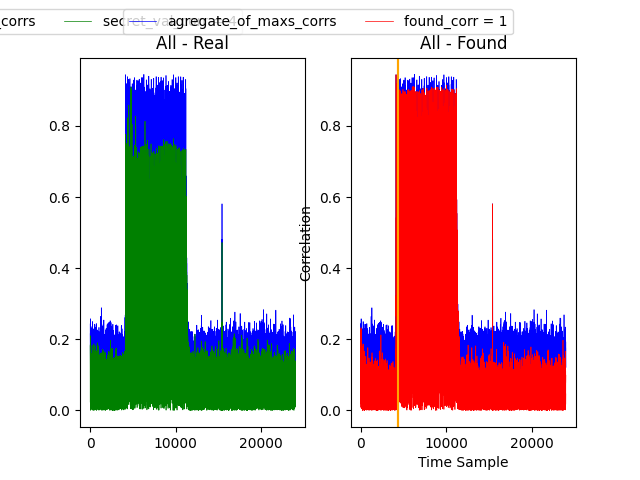

In [212]:
    #secret_weight = []
    index = 0
    #for i in out_data[0][3:out_data[0][2]+2]:
    #    secret_weight.append(i)
    stop_num = 5
    maxims_map = None
    last_found_indx = 0


    secret_weight = []
    for i in range(50):
        secret_weight.append(i)
    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(np.array(ncorr_all),
                                                                                                                     peak_range = 0.2,
                                                                                                                     show_info=True,
                                                                                                                     lastIndex=index,
                                                                                                                     map_2dgrMaxs=maxims_map,
                                                                                                                     mountain_half_dist = 20,
                                                                                                                    level = 3)
        
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = last_found_indx, color = 'orange')
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = last_found_indx, color = 'orange')

        #figure.savefig(f'{name}_correlation.png')

        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample

In range 0 - 24000
 Index of global max: 4241 and global_max_val: 0.9877931674720927


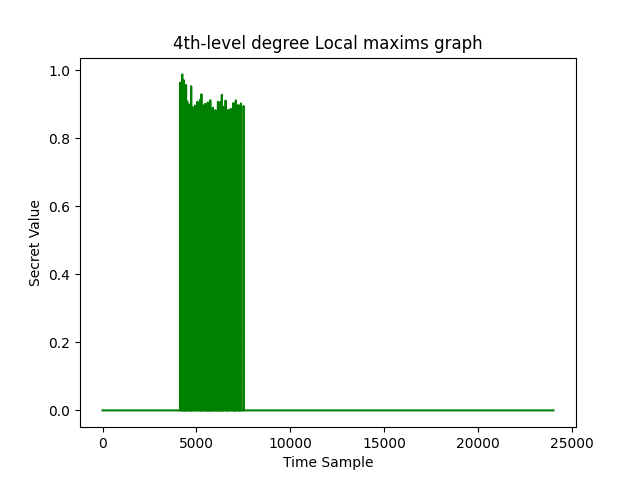

Local maxims: [1, 1, 1, 3, 1, 5, 7, 1, 9, 11, 13, 15, 1, 17, 19, 20, 21, 22, 23, 1, 25, 27, 28, 29, 30, 31, 1, 1, 35, 1, 37, 39, 41, 42, 43, 45, 46, 47, 49]


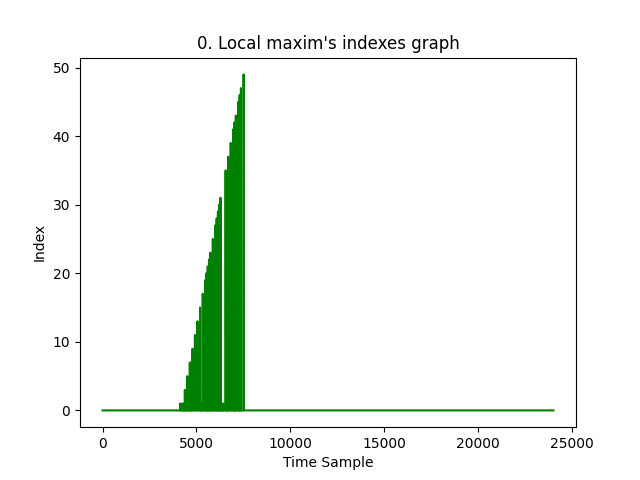

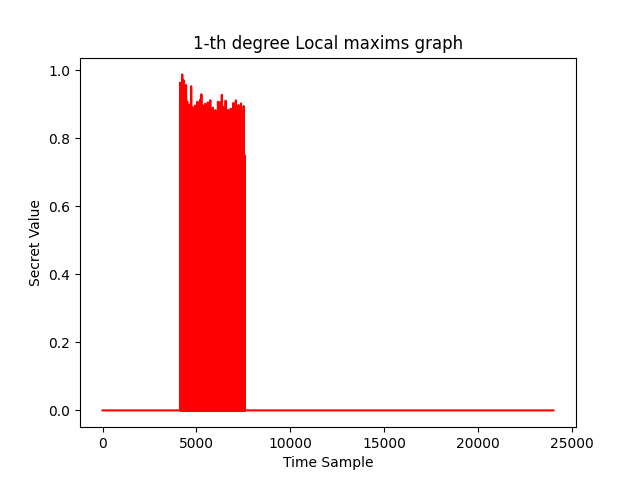

Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 1, 3, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 2, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 1, 1, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 1, 1, 10, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 11, 11, 11, 11, 11, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 12, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 13, 13, 13, 13, 13, 13, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 14, 14, 7, 14, 7, 1, 1, 1, 1, 1, 15, 15, 15, 15, 15, 15, 1, 1, 1, 1, 4, 16, 16, 1, 1, 1, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 17, 17, 1, 1, 17, 17, 17, 1,

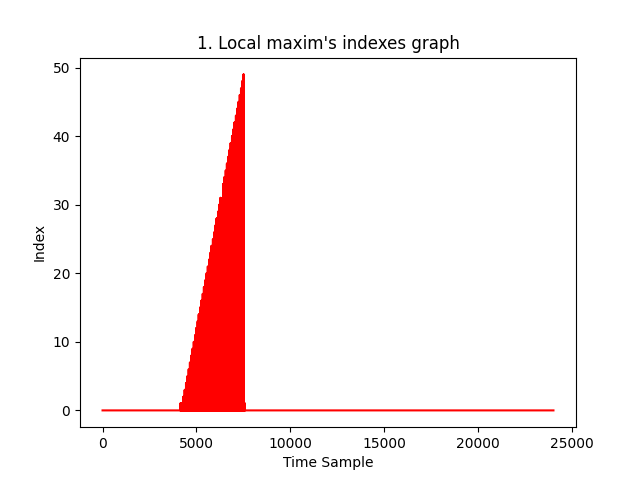

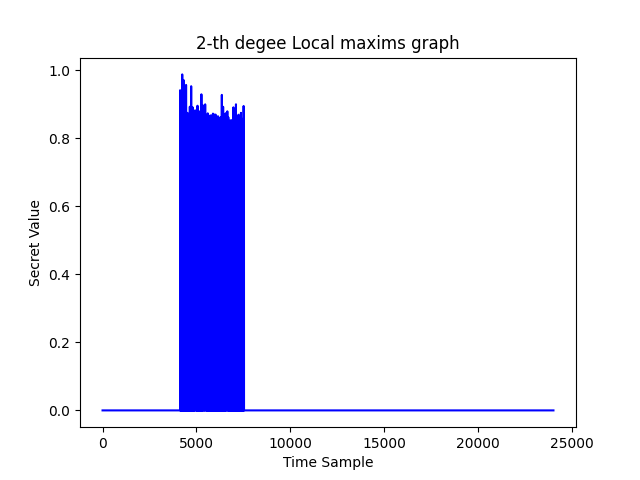

Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 5, 1, 6, 1, 7, 1, 1, 1, 1, 9, 1, 10, 1, 11, 12, 1, 13, 1, 14, 1, 15, 1, 1, 1, 17, 1, 1, 19, 20, 1, 21, 1, 22, 1, 23, 1, 1, 1, 25, 1, 26, 1, 27, 1, 28, 1, 1, 29, 1, 30, 1, 1, 31, 1, 1, 1, 1, 1, 1, 1, 35, 1, 1, 37, 1, 38, 1, 39, 1, 1, 1, 1, 41, 1, 42, 1, 1, 43, 1, 44, 1, 45, 1, 46, 1, 47, 1, 1, 1, 1, 1, 49, 1]


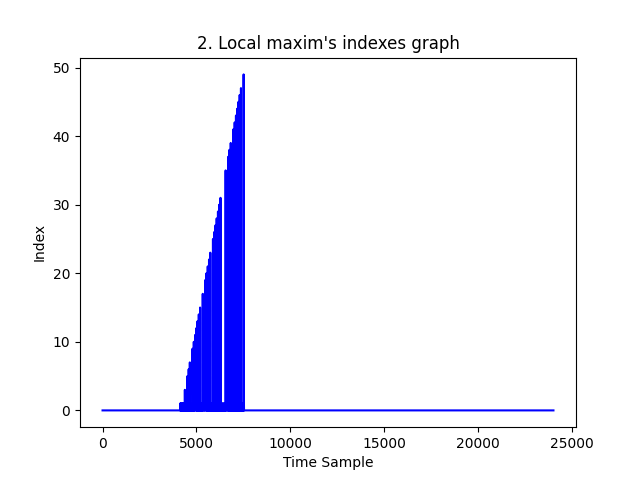

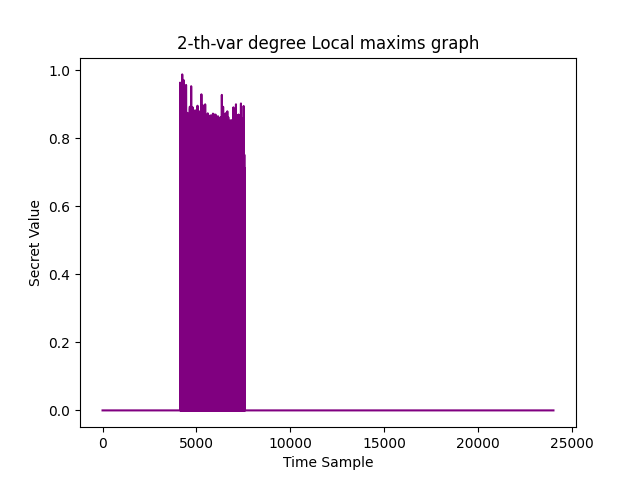

Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 6, 1, 3, 6, 6, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 4, 1, 1, 1, 2, 8, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 9, 9, 1, 1, 1, 1, 1, 1, 10, 1, 1, 10, 10, 1, 1, 1, 1, 1, 1, 1, 11, 11, 11, 11, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 13, 13, 13, 13, 13, 13, 1, 1, 1, 1, 1, 1, 14, 14, 14, 7, 1, 1, 1, 15, 15, 15, 15, 1, 1, 4, 16, 1, 1, 1, 16, 1, 1, 1, 1, 1, 1, 1, 1, 17, 1, 1, 17, 17, 1, 1, 1, 1, 1, 1, 18, 1, 1, 18, 18, 1, 1, 1, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 19, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 1, 1, 20, 20, 1, 1, 1, 1, 1, 21, 21, 1, 21, 21, 1, 1, 1, 1, 1, 1, 22, 22, 11, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23, 23, 23, 23, 23, 1, 1, 1, 1, 1, 24, 24, 1, 1, 1, 1, 1, 25, 1, 1, 25, 25, 1, 1, 1, 1, 1, 1, 1, 26, 1, 1, 26,

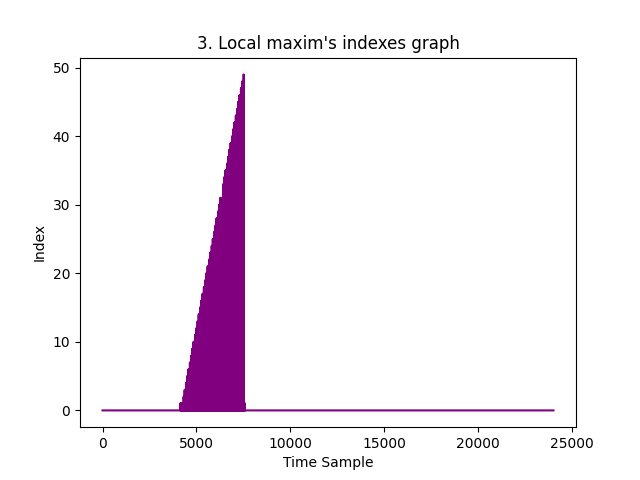

 Found the soonest secret value is 1, at the time sample 4127, with correlation secret_corr = 0.941


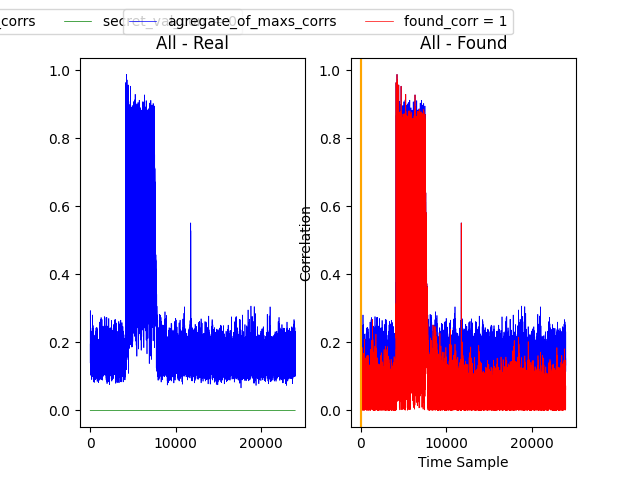

In range 4143 - 24000
 Found the soonest secret value is 1, at the time sample 4159, with correlation secret_corr = 0.790


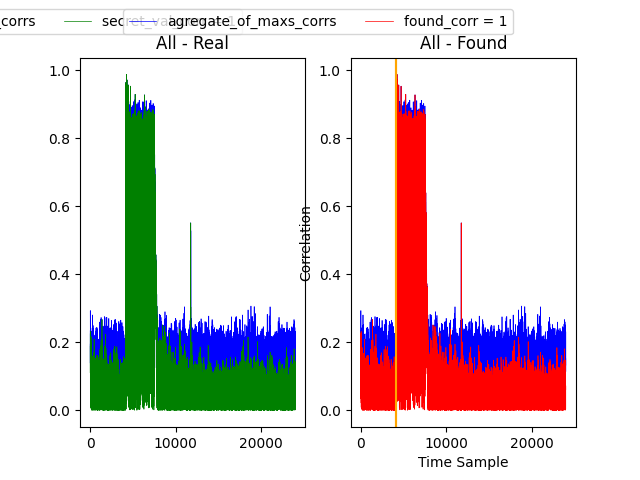

In range 4166 - 24000
 Found the soonest secret value is 1, at the time sample 4174, with correlation secret_corr = 0.934


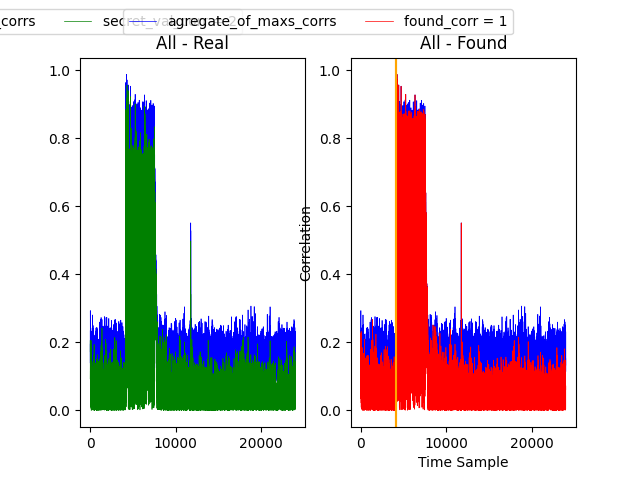

In range 4185 - 24000
 Found the soonest secret value is 1, at the time sample 4195, with correlation secret_corr = 0.848


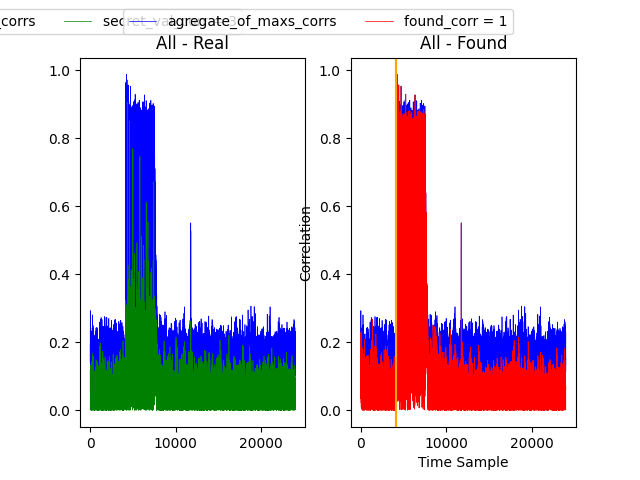

In range 4218 - 24000
 Found the soonest secret value is 1, at the time sample 4241, with correlation secret_corr = 0.988


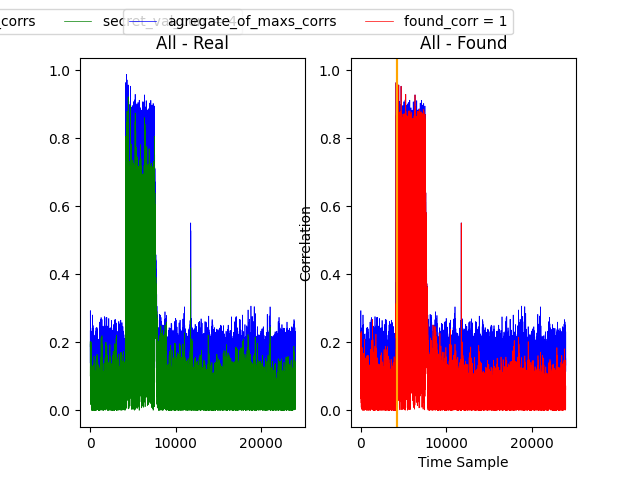

In [184]:
    #secret_weight = []
    index = 0
    #for i in out_data[0][3:out_data[0][2]+2]:
    #    secret_weight.append(i)
    stop_num = 5
    maxims_map = None
    last_found_indx = 0


    secret_weight = []
    for i in range(50):
        secret_weight.append(i)
    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(np.array(ncorr_all),
                                                                                                                     peak_range = 0.3,
                                                                                                                     show_info=True,
                                                                                                                     lastIndex=index,
                                                                                                                     map_2dgrMaxs=maxims_map,
                                                                                                                     mountain_half_dist = 10,
                                                                                                                    level = 4)
        
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = last_found_indx, color = 'orange')
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = last_found_indx, color = 'orange')

        #figure.savefig(f'{name}_correlation.png')

        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample

In range 0 - 24000
 Index of global max: 4241 and global_max_val: 0.9877931674720927


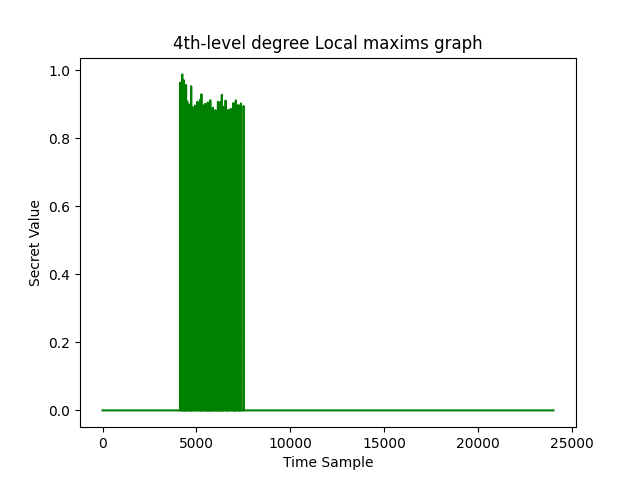

Local maxims: [1, 1, 1, 3, 1, 5, 7, 1, 9, 11, 13, 15, 1, 17, 19, 20, 21, 22, 23, 1, 25, 27, 28, 29, 30, 31, 1, 1, 35, 1, 37, 39, 41, 42, 43, 45, 46, 47, 49]


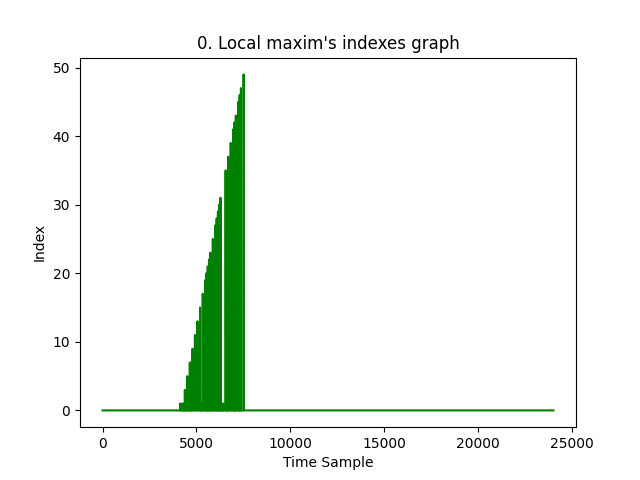

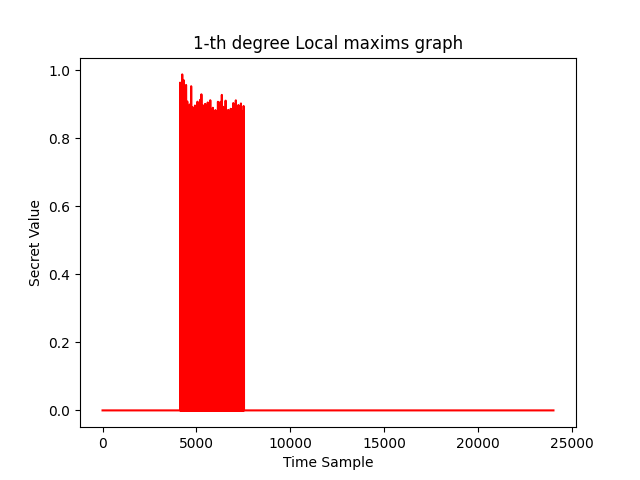

Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 6, 6, 6, 1, 1, 7, 7, 7, 7, 7, 7, 1, 1, 4, 4, 1, 1, 1, 2, 1, 1, 9, 9, 1, 1, 9, 9, 9, 1, 1, 10, 10, 10, 1, 1, 11, 11, 11, 11, 1, 1, 12, 1, 12, 1, 1, 13, 13, 13, 13, 13, 1, 1, 14, 14, 14, 1, 1, 15, 15, 15, 15, 1, 1, 4, 16, 1, 1, 1, 16, 1, 1, 17, 17, 1, 1, 17, 17, 1, 1, 18, 18, 18, 1, 1, 18, 1, 1, 19, 19, 19, 19, 1, 1, 20, 20, 1, 20, 1, 1, 21, 21, 21, 1, 1, 22, 22, 11, 1, 1, 23, 23, 23, 1, 1, 24, 24, 1, 1, 1, 1, 25, 25, 1, 1, 25, 25, 1, 1, 26, 26, 1, 26, 1, 1, 27, 27, 1, 1, 28, 28, 28, 1, 1, 29, 29, 29, 1, 1, 30, 30, 1, 1, 31, 31, 31, 1, 1, 4, 1, 1, 1, 8, 1, 1, 33, 33, 1, 1, 1, 33, 33, 1, 1, 34, 34, 34, 1, 1, 34, 1, 1, 35, 35, 35, 35, 35, 1, 1, 36, 36, 1, 1, 36, 1, 1, 37, 37, 37, 1, 1, 38, 38, 38, 1, 1, 39, 39, 39, 1, 1, 40, 1, 1, 1, 1, 41, 41, 1, 41, 41, 1, 1, 42, 42, 42, 1, 1, 43, 43, 43, 43, 43, 1, 1,

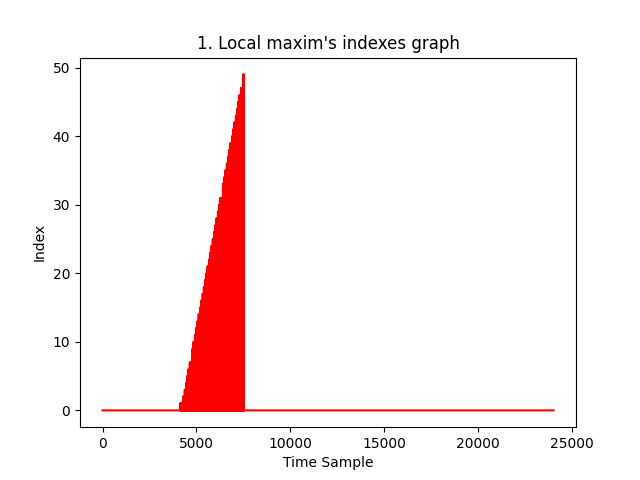

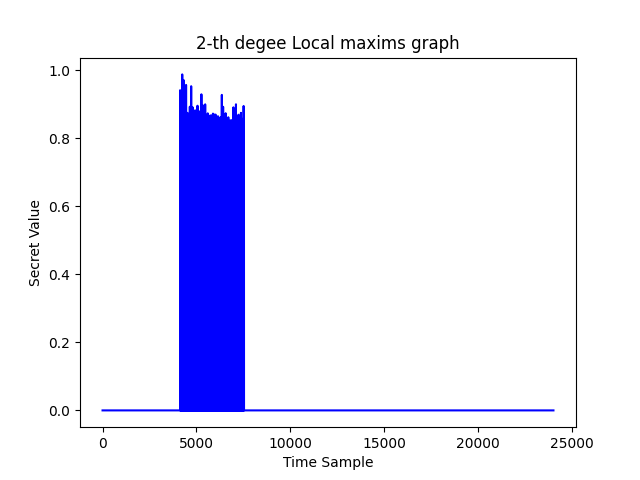

Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 5, 1, 6, 1, 7, 1, 1, 1, 9, 1, 10, 1, 11, 1, 12, 1, 13, 1, 14, 1, 15, 1, 1, 1, 17, 1, 18, 1, 19, 1, 20, 1, 21, 1, 22, 1, 23, 1, 1, 1, 25, 1, 26, 1, 27, 1, 28, 1, 29, 1, 30, 1, 31, 1, 1, 1, 1, 1, 1, 1, 35, 1, 36, 1, 37, 1, 38, 1, 39, 1, 1, 1, 41, 1, 42, 1, 43, 1, 44, 1, 45, 1, 46, 1, 47, 1, 1, 1, 49, 1]


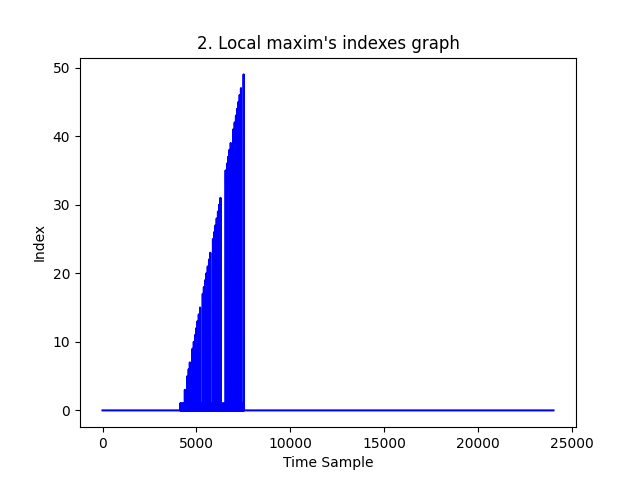

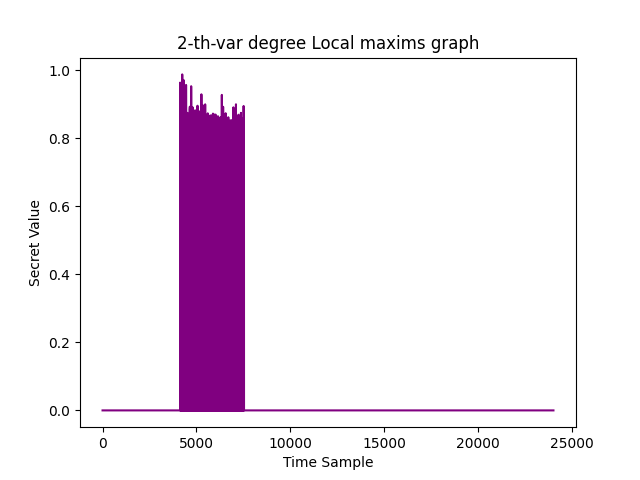

Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 3, 3, 3, 3, 1, 4, 1, 1, 1, 1, 1, 5, 5, 1, 6, 1, 7, 7, 7, 7, 1, 1, 1, 1, 2, 1, 9, 1, 1, 9, 9, 1, 10, 1, 11, 11, 1, 12, 1, 13, 13, 13, 1, 14, 14, 1, 15, 15, 1, 1, 1, 1, 16, 1, 17, 1, 1, 17, 1, 18, 1, 18, 1, 19, 19, 19, 1, 20, 20, 1, 21, 21, 1, 22, 11, 1, 23, 23, 1, 1, 1, 1, 25, 1, 25, 25, 1, 26, 26, 1, 27, 1, 28, 28, 1, 29, 29, 1, 30, 1, 31, 31, 1, 1, 1, 1, 8, 1, 1, 1, 33, 33, 1, 34, 1, 34, 1, 35, 35, 35, 1, 1, 36, 1, 37, 1, 38, 38, 1, 39, 39, 1, 1, 1, 1, 41, 41, 41, 1, 42, 1, 43, 43, 43, 1, 1, 44, 1, 45, 45, 1, 46, 46, 1, 47, 47, 1, 1, 1, 1, 49, 49, 1]


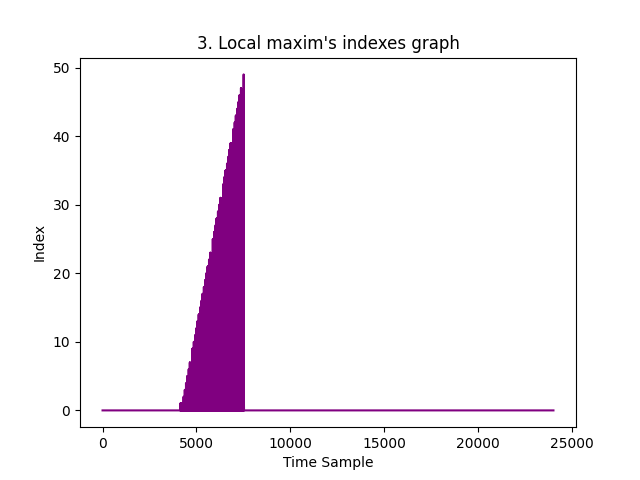

 Found the soonest secret value is 1, at the time sample 4127, with correlation secret_corr = 0.941


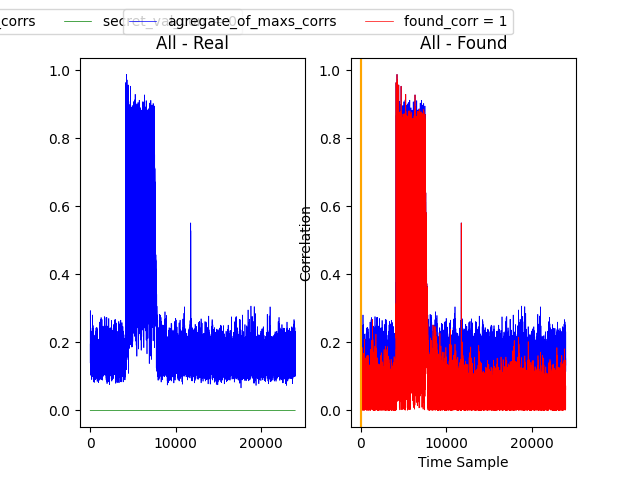

In range 4143 - 24000
 Found the soonest secret value is 1, at the time sample 4159, with correlation secret_corr = 0.790


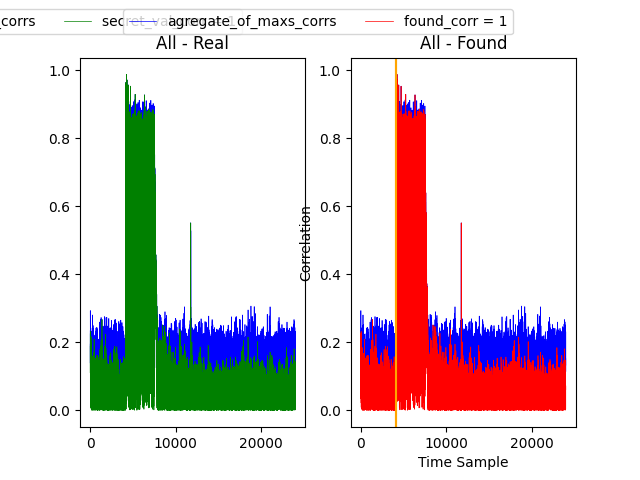

In range 4166 - 24000
 Found the soonest secret value is 1, at the time sample 4174, with correlation secret_corr = 0.934


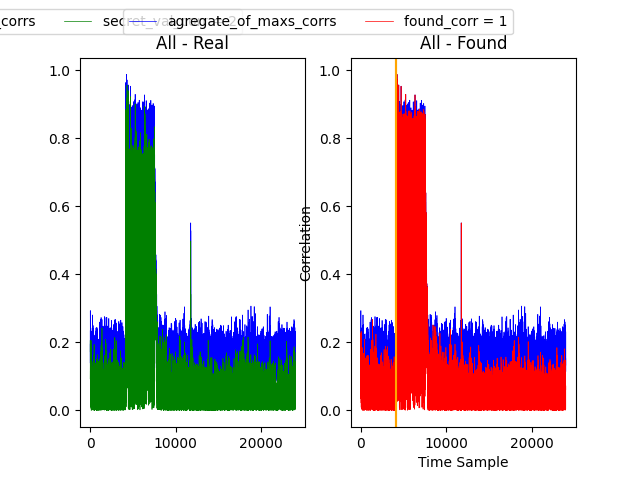

In range 4185 - 24000
 Found the soonest secret value is 1, at the time sample 4195, with correlation secret_corr = 0.848


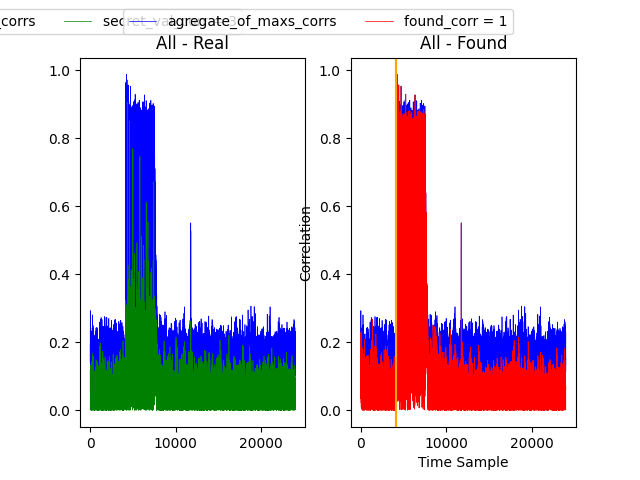

In range 4218 - 24000
 Found the soonest secret value is 1, at the time sample 4241, with correlation secret_corr = 0.988


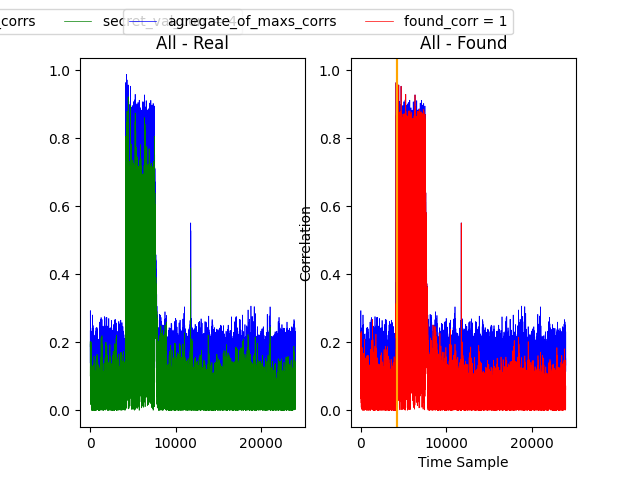

In [167]:
    #secret_weight = []
    index = 0
    #for i in out_data[0][3:out_data[0][2]+2]:
    #    secret_weight.append(i)
    stop_num = 5
    maxims_map = None
    last_found_indx = 0


    secret_weight = []
    for i in range(50):
        secret_weight.append(i)
    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(np.array(ncorr_all),
                                                                                                                     peak_range = 0.2,
                                                                                                                     show_info=True,
                                                                                                                     lastIndex=index,
                                                                                                                     map_2dgrMaxs=maxims_map,
                                                                                                                     mountain_half_dist = 10,
                                                                                                                    level = 4)
        
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = last_found_indx, color = 'orange')
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = last_found_indx, color = 'orange')

        #figure.savefig(f'{name}_correlation.png')

        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample

In [ ]:
%matplotlib ipympl
import matplotlib.pylab as plt
    
plt.plot([1,2,2,4,5], 'r')
plt.plot([3,1,5,5,7], 'g')
plt.show()
#plt.close(fig)